In [ ]:
from matplotlib.gridspec import GridSpec

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np

import socket
socket.gethostname()

import sys
IN_COLAB = 'google.colab' in sys.modules


file_name = 'Airline Quality Ratings.csv'
processed_file_name = 'Airline Quality Ratings - Processed.csv'

df = None

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/'+file_name)
else:
    df = pd.read_csv(file_name)



Mounted at /content/drive


###**Learning the data**

In [ ]:
print(df.head())


   ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   ...  On-board Service  Seat Comfort  Leg Room Service  Cleanlines

In [ ]:
print(df.describe())


                  ID            Age  Flight Distance  Departure Delay  \
count  129880.000000  129880.000000    129880.000000    129880.000000   
mean    64940.500000      39.427957      1190.316392        14.713713   
std     37493.270818      15.119360       997.452477        38.071126   
min         1.000000       7.000000        31.000000         0.000000   
25%     32470.750000      27.000000       414.000000         0.000000   
50%     64940.500000      40.000000       844.000000         0.000000   
75%     97410.250000      51.000000      1744.000000        12.000000   
max    129880.000000      85.000000      4983.000000      1592.000000   

       Arrival Delay  Departure and Arrival Time Convenience  \
count  129487.000000                           129880.000000   
mean       15.091129                                3.057599   
std        38.465650                                1.526741   
min         0.000000                                0.000000   
25%         0.000000  

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298



# Preparing the data

```

```



In [ ]:
df.isna().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,393
Departure and Arrival Time Convenience,0


In [ ]:
df.loc[df['Arrival Delay'].isna(), 'Arrival Delay'] = df['Arrival Delay'].median()

In [ ]:
df.isna().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,0
Departure and Arrival Time Convenience,0


In [ ]:
df.drop(["ID"],axis=1,inplace=True)


# Write the processed file after the cleanning

In [ ]:
if IN_COLAB:
    df.to_csv('/content/drive/My Drive/Colab Notebooks/'+processed_file_name, index=True)
else:
    df.to_csv(processed_file_name, index=False)


# Analyzing the data

###**Univariate** **analysis**

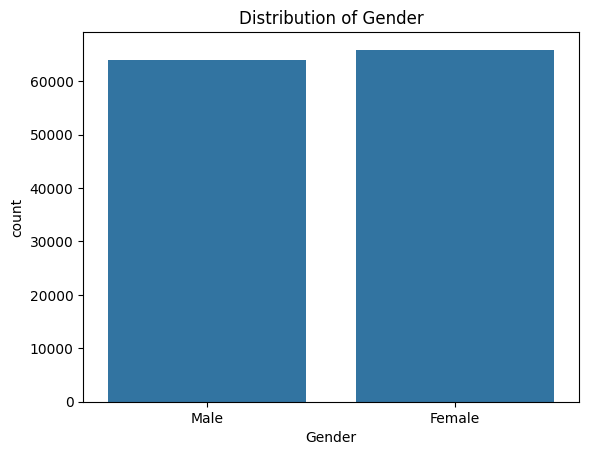

In [ ]:
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.show()


יש מעט יותר נשים מגברים במדגם אך לא מדובר בהבדל משמעותי

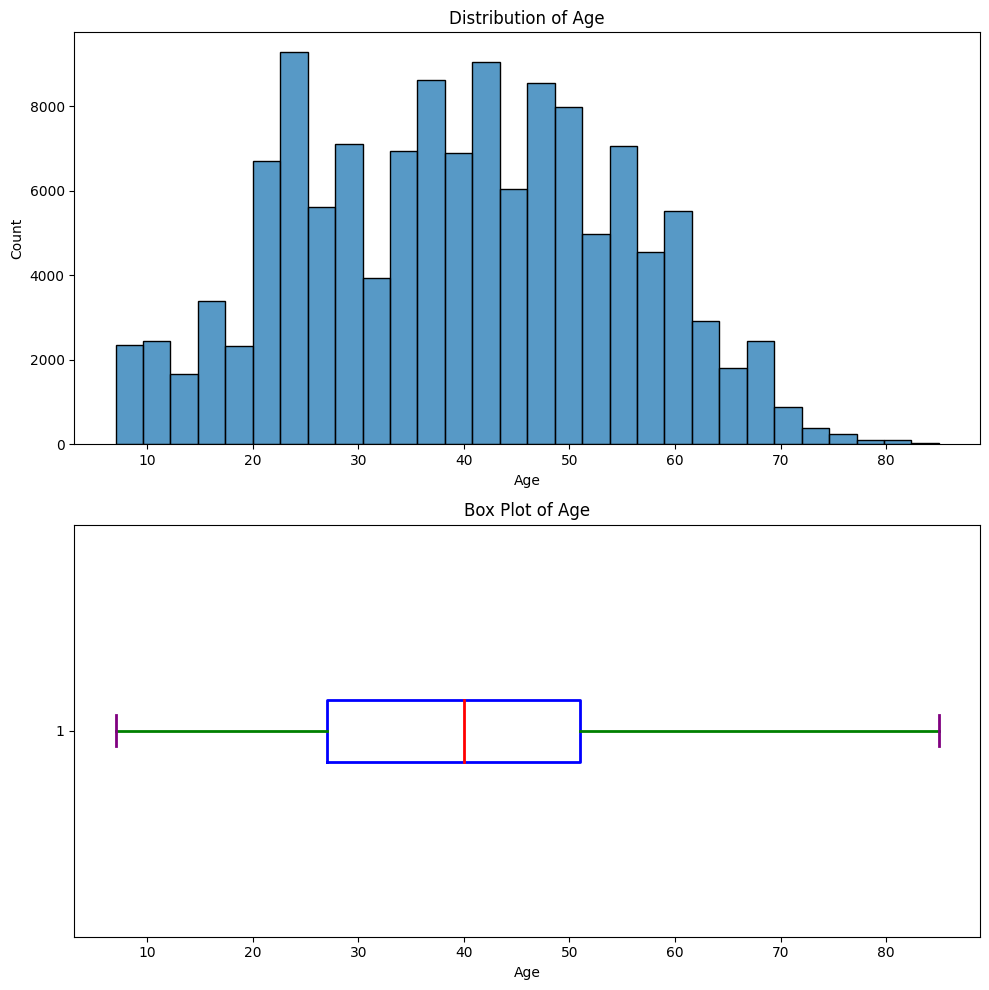

In [ ]:
# Create the figure and two subplots (one on top of the other)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=False)

# Plot histogram on the first subplot
sns.histplot(data=df, x='Age', bins=30, ax=ax1, kde=False)
ax1.set_title('Distribution of Age')
ax1.set_xlabel('Age')

# Plot boxplot on the second subplot
boxprops = dict(color="blue", linewidth=2)
medianprops = dict(color="red", linewidth=2)
whiskerprops = dict(color="green", linewidth=2)
capprops = dict(color="purple", linewidth=2)

ax2.boxplot(df['Age'], vert=False, boxprops=boxprops, medianprops=medianprops,
            whiskerprops=whiskerprops, capprops=capprops)
ax2.set_title('Box Plot of Age')
ax2.set_xlabel('Age')

# Show the combined plot
plt.tight_layout()
plt.show()

הגיל המינימלי במדגם הוא 7 והגיל המקסימלי הוא 85, ניתן לראות כי רוב העונים נמצאים בטווח בין גיל 20-60

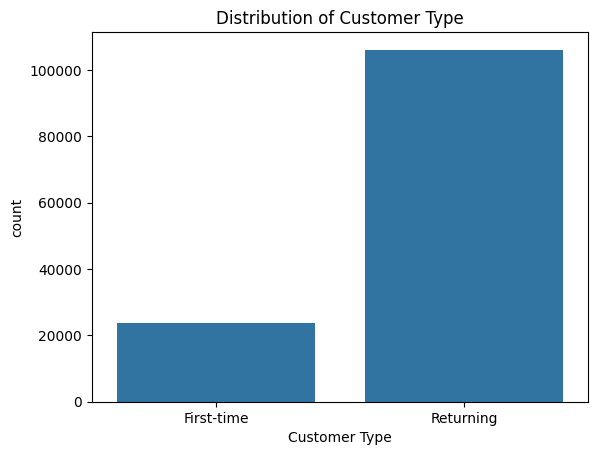

In [ ]:
sns.countplot(data=df, x='Customer Type')
plt.title('Distribution of Customer Type')
plt.show()


 הרוב המוחלט של הנוסעים בחברה הם נוסעים חוזרים

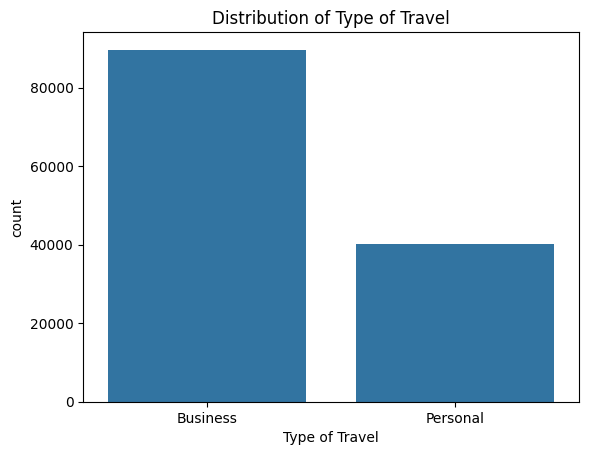

In [ ]:
sns.countplot(data=df, x='Type of Travel')
plt.title('Distribution of Type of Travel')
plt.show()


 ניתן לראות כי רוב הנוסעים הם למטרות עסקים

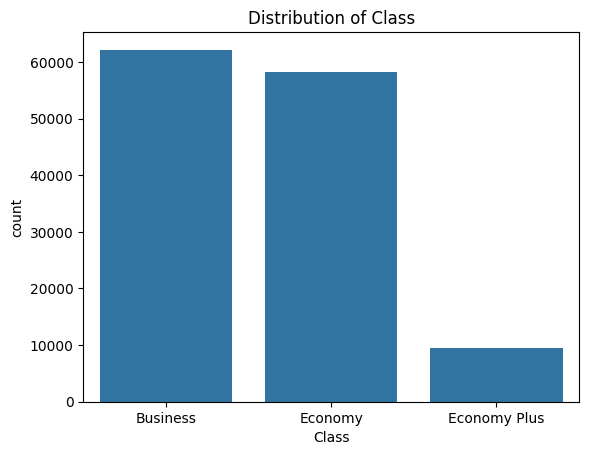

In [ ]:
sns.countplot(data=df, x='Class')
plt.title('Distribution of Class')
plt.show()


 רוב הנוסעים שענו על הסקר הם ממחלקת עסקים, לאחר מכן מחלקת תיירים, ומעט במחלקת תיירים פלוס (משודרגת)


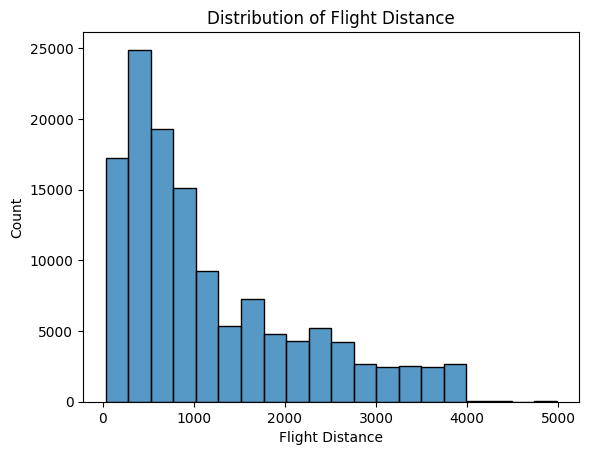

In [ ]:
sns.histplot(data=df, x='Flight Distance', bins=20)
plt.title('Distribution of Flight Distance')
plt.show()


 ניתן לראות שחלק ניכר מאוד מהטיסות בחברה הן עד 1000 ק"מ, וככל שהמרחק גדול יותר כך יש פחות טיסות

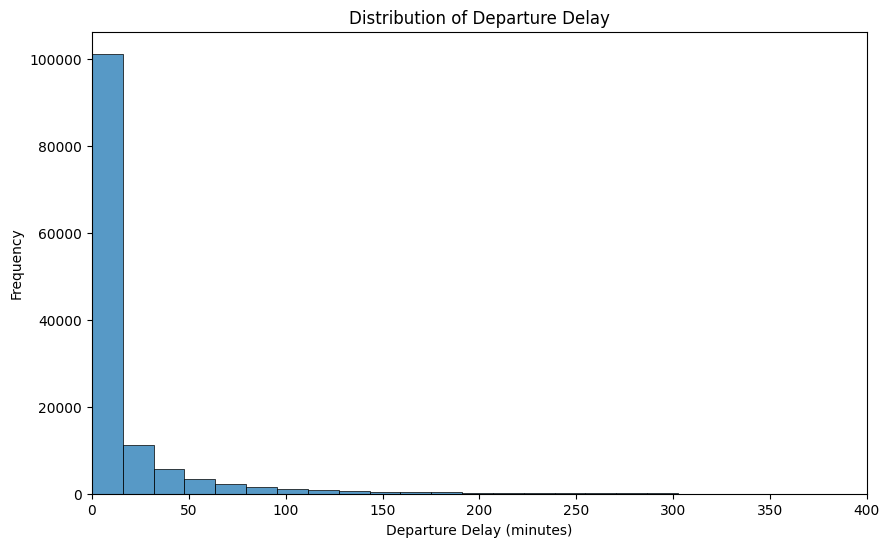

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Departure Delay', bins=100)

plt.xlim(0, 400)

plt.title('Distribution of Departure Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.show()




  ניתן לראות כי בסך הכל לרוב הטיסות אין עיכוב גדול בהמראה, רוב העיכובים סביב ה-20 דקות ומיעוט מעל 50 דקות


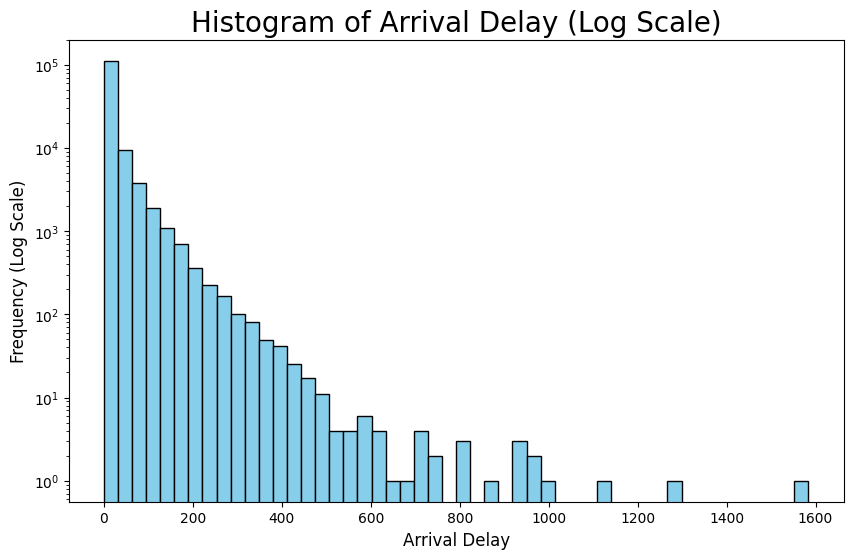

In [ ]:
#Show the Frequency

plt.figure(figsize=(10, 6))
plt.hist(df['Arrival Delay'], bins=50, color='skyblue', edgecolor='black')
plt.yscale('log')
plt.title('Histogram of Arrival Delay (Log Scale)', fontsize=20)
plt.xlabel('Arrival Delay', fontsize=12)
plt.ylabel('Frequency (Log Scale)', fontsize=12)
plt.show()

כאן ניתן לראות את ההיסטוגרמה של העיכובים בנחיתות ביעד. על מנת שיהיה אפשר לצפות בה בצורה נוחה, הציר האנכי מוצג בסדרי גודל של לוג.

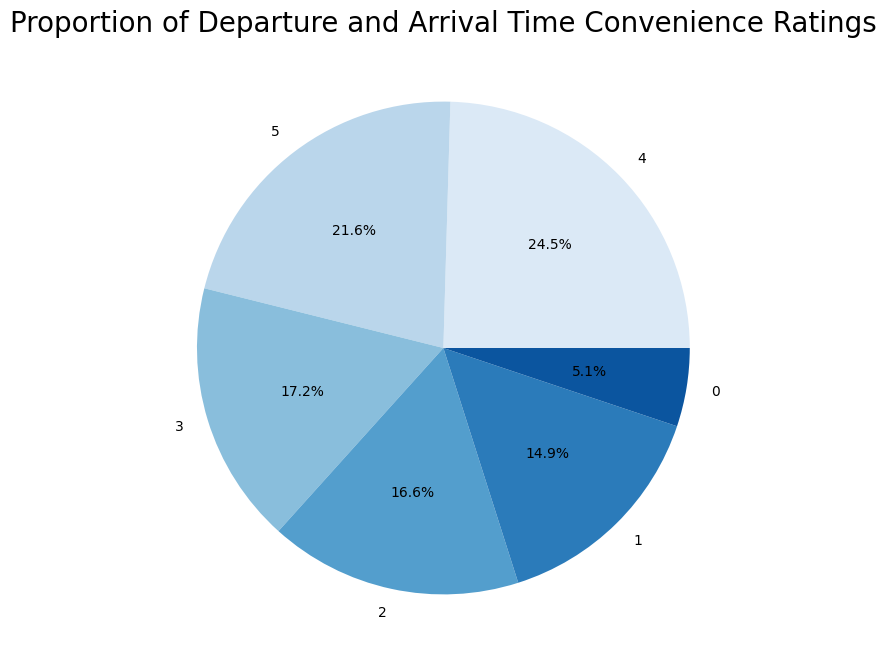

In [ ]:
plt.figure(figsize=(8, 8))
df['Departure and Arrival Time Convenience'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Blues'))
plt.title('Proportion of Departure and Arrival Time Convenience Ratings', fontsize=20)
plt.ylabel('')
plt.show()

הגרף עוגה מציג את דירוג הנוחות של הנוסעים מבחינת זמני המראות ונחיתות, ניתן לראות שיותר מ50% מהנוסעים לא ממש מרוצים (ציונים 0-3)

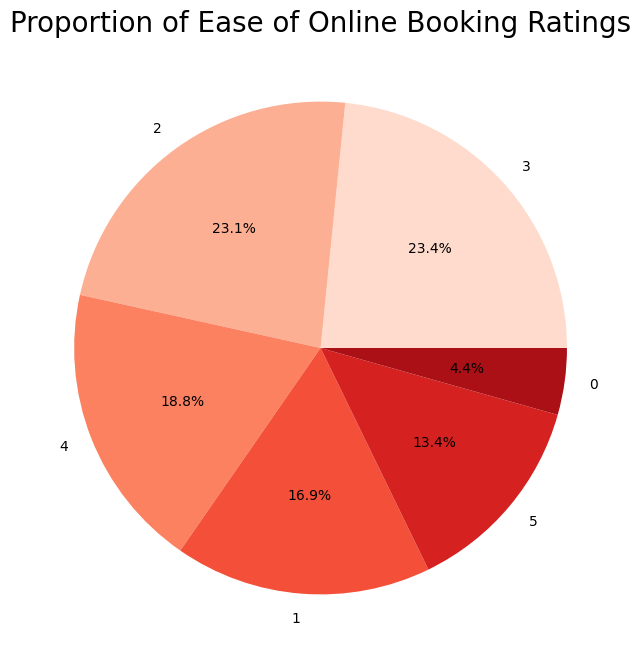

In [ ]:
plt.figure(figsize=(8, 8))
df['Ease of Online Booking'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Reds'))
plt.title('Proportion of Ease of Online Booking Ratings', fontsize=20)
plt.ylabel('')
plt.show()

הגרף עוגה מציג את דירוג הנוחות של הזמנת כרטיס טיסה באינטרנט, גם כאן ניתן לראות בקלות שיותר מ50% מהנוסעים לא ממש מרוצים (לקחנו בחשבון שרק ציון של 4 או 5 נחשב נוסע מרוצה)

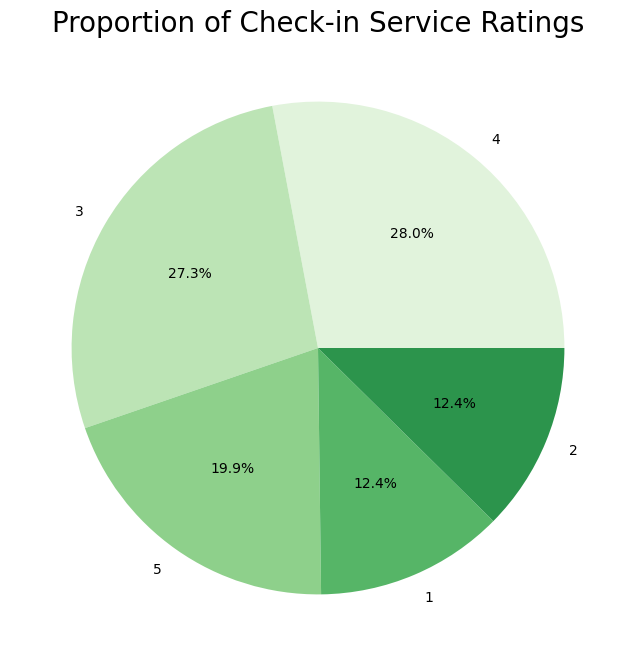

In [ ]:
plt.figure(figsize=(8, 8))
filtered_data = df['Check-in Service'][df['Check-in Service'] != 0]
filtered_data.value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Greens'))
plt.title('Proportion of Check-in Service Ratings', fontsize=20)
plt.ylabel('')
plt.show()

הגרף עוגה מציג את דירוג הנוחות של הצ'ק אין לטיסה

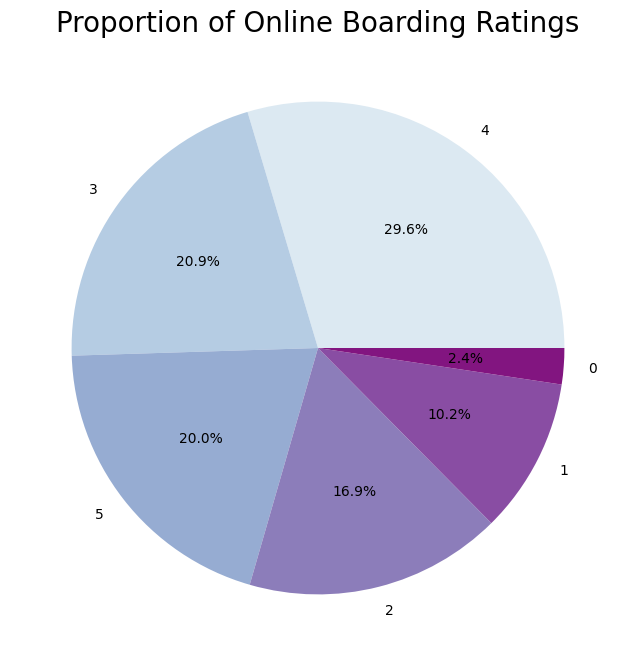

In [ ]:
plt.figure(figsize=(8, 8))
df['Online Boarding'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('BuPu'))
plt.title('Proportion of Online Boarding Ratings', fontsize=20)
plt.ylabel('')
plt.show()

הגרף עוגה מציג את דירוג הנוחות של הבורדינג באינטרנט, כאן ניתן לראות שקרוב ל50% מהנוסעים יחסית מרוצים (ציון 4 או 5)

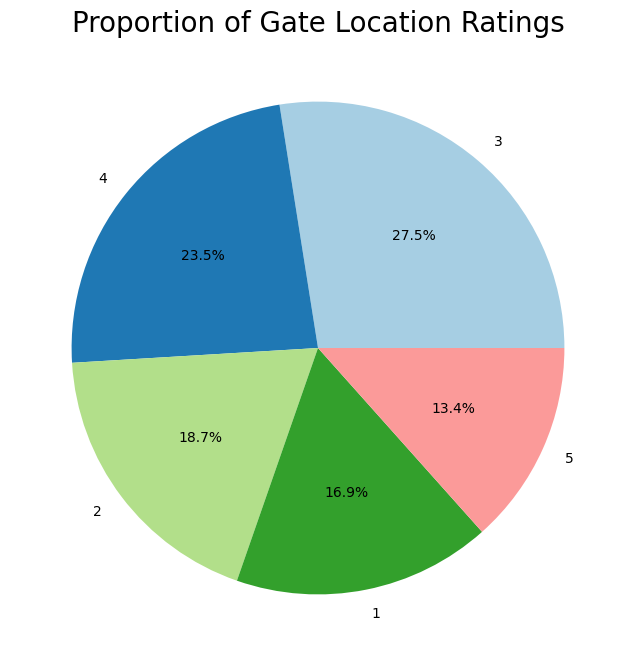

In [ ]:
plt.figure(figsize=(8, 8))
filtered_data = df['Gate Location'][df['Gate Location'] != 0]
filtered_data.value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Paired'))
plt.title('Proportion of Gate Location Ratings', fontsize=20)
plt.ylabel('')
plt.show()

הגרף עוגה מציג את דירוג הנוחות של מציאת השער להמראה, גם כאן חלק גדול הנוסעים לא ממש מרוצים

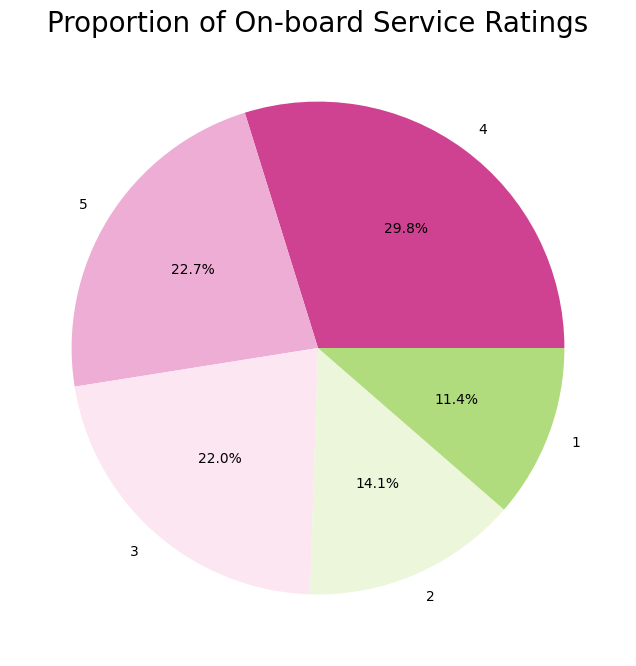

In [ ]:
plt.figure(figsize=(8, 8))
filtered_data = df['On-board Service'][df['On-board Service'] != 0]
filtered_data.value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('PiYG'))
plt.title('Proportion of On-board Service Ratings', fontsize=20)
plt.ylabel('')
plt.show()

הגרף עוגה מציג את דירוג השירות בזמן הטיסה, כאן ניתן לראות שיותר מ50% מהנוסעים מרוצים.

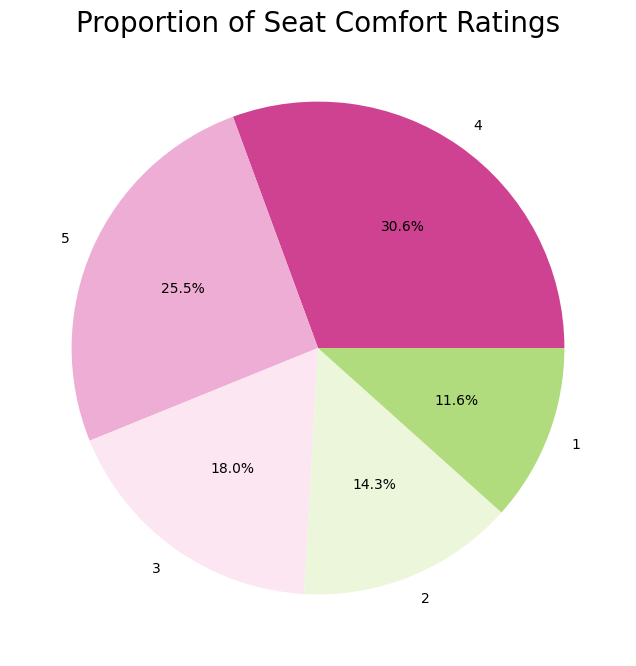

In [ ]:
plt.figure(figsize=(8, 8))
filtered_data = df['Seat Comfort'][df['Seat Comfort'] != 0]
filtered_data.value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('PiYG'))
plt.title('Proportion of Seat Comfort Ratings', fontsize=20)
plt.ylabel('')
plt.show()

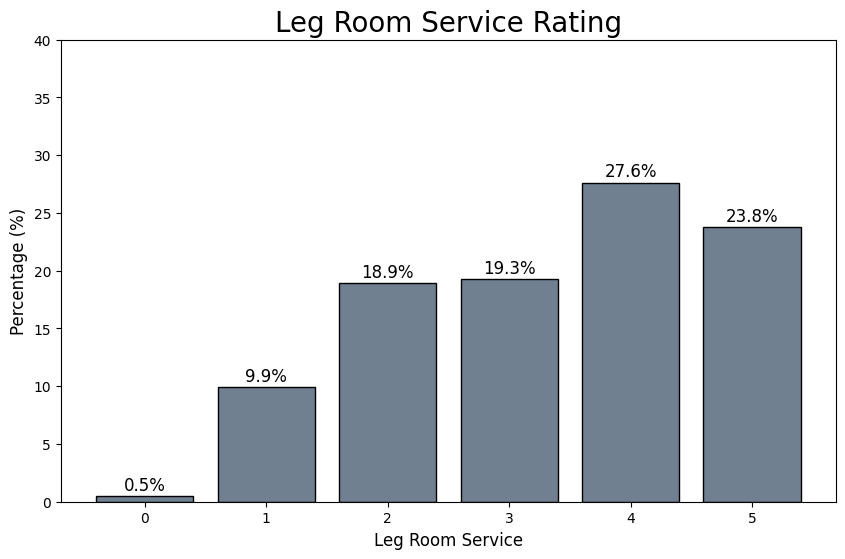

In [ ]:
counts = df['Leg Room Service'].value_counts(normalize=True) * 100
sorted_counts = counts.sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_counts.index, sorted_counts.values, color='slategrey', edgecolor='black')

# Add the percentages on top of each bar
for index, value in enumerate(sorted_counts.values):
    plt.text(index + 0, value + 0.5, f'{value:.1f}%', ha='center', fontsize=12)

plt.title('Leg Room Service Rating', fontsize=20)
plt.xlabel('Leg Room Service', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 40)
plt.show()

בהקשר של שביעות רצון מקום הרגליים הדירוגים מתרכזים בחלקים הגבוהים ודרגי הבייניים. 50 אחוז דירגו רמת שביעות רצון גבוהה של 4 או 5

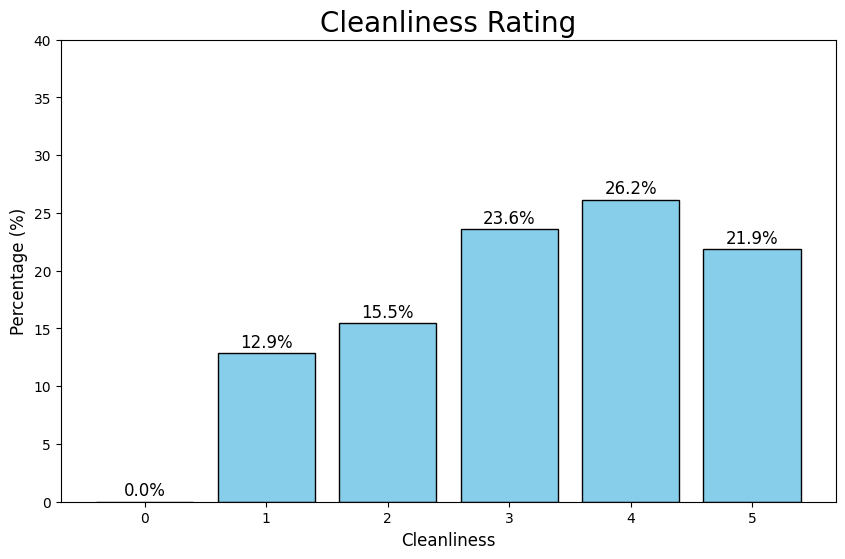

In [ ]:
counts = df['Cleanliness'].value_counts(normalize=True) * 100
sorted_counts = counts.sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_counts.index, sorted_counts.values, color='skyblue', edgecolor='black')

# Add the percentages on top of each bar
for index, value in enumerate(sorted_counts.values):
    plt.text(index + 0, value + 0.5, f'{value:.1f}%', ha='center', fontsize=12)

plt.title('Cleanliness Rating', fontsize=20)
plt.xlabel('Cleanliness', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 40)
plt.show()

רוב התוצאות נמצאות משלוש ומעלה מצביע שרוב האנשים בסה"כ מרוצים מרמת הניקיון


אפשר לראות שבאשר לאוכל ולשתיה הדעות חלוקות, הדירוג מתפלג די שיווני בין דירוג גבוה בינוני ונמוך. מעניין יהיה לבחון לפי המחלקות

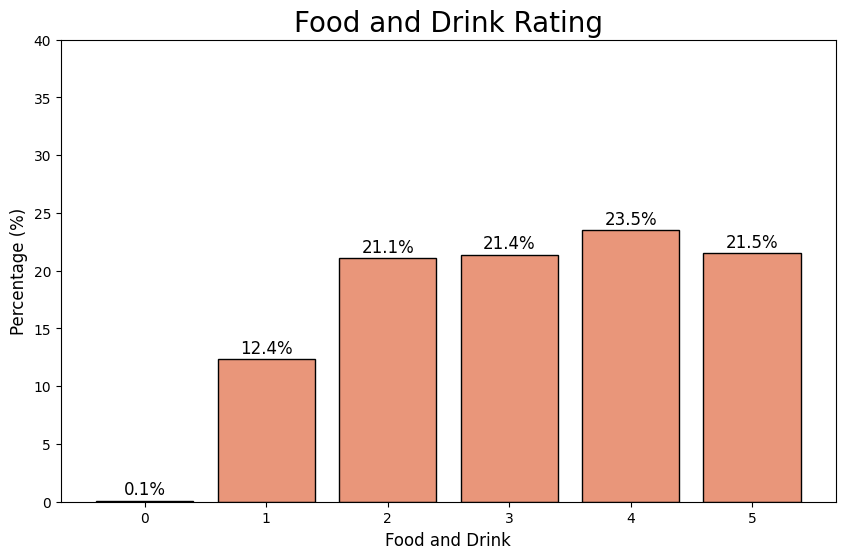

In [ ]:
counts = df['Food and Drink'].value_counts(normalize=True) * 100
sorted_counts = counts.sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_counts.index, sorted_counts.values, color='darksalmon', edgecolor='black')

# Add the percentages on top of each bar
for index, value in enumerate(sorted_counts.values):
    plt.text(index + 0, value + 0.5, f'{value:.1f}%', ha='center', fontsize=12)

plt.title('Food and Drink Rating', fontsize=20)
plt.xlabel('Food and Drink', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 40)
plt.show()

אפשר לראות שבאשר לאוכל ולשתיה הדעות חלוקות, הדירוג מתפלג די שיווני בין דירוג גבוה בינוני ונמוך. מעניין יהיה לבחון לפי המחלקות

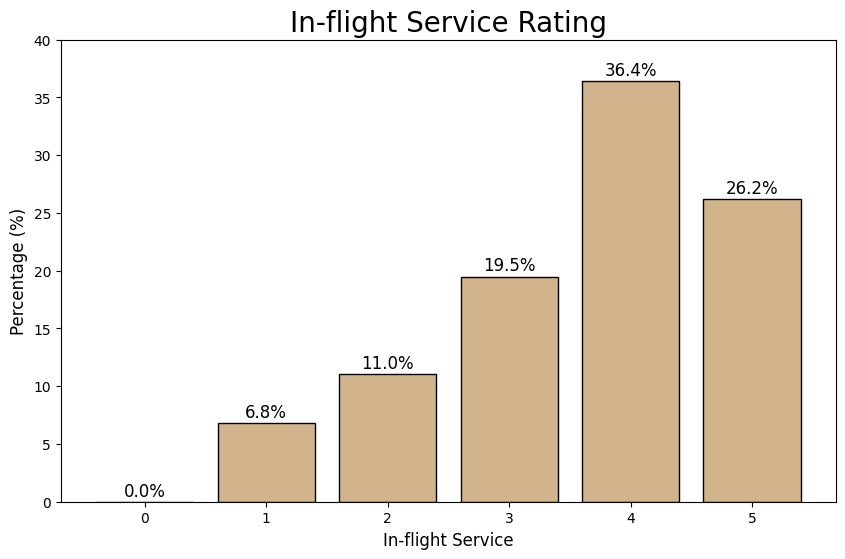

In [ ]:
counts = df['In-flight Service'].value_counts(normalize=True) * 100
sorted_counts = counts.sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_counts.index, sorted_counts.values, color='tan', edgecolor='black')

# Add the percentages on top of each bar
for index, value in enumerate(sorted_counts.values):
    plt.text(index + 0, value + 0.5, f'{value:.1f}%', ha='center', fontsize=12)

plt.title('In-flight Service Rating', fontsize=20)
plt.xlabel('In-flight Service', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 40)
plt.show()

ישנו רוב לאנשים שהיו די מרוצים או מרוצים מאוד מהשירותים שניתנו במהלך הטיסה

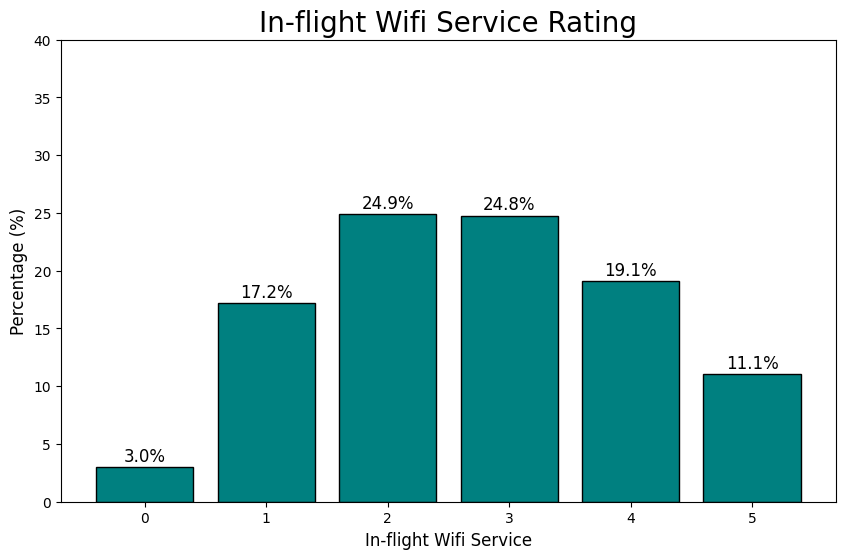

In [ ]:
counts = df['In-flight Wifi Service'].value_counts(normalize=True) * 100
sorted_counts = counts.sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_counts.index, sorted_counts.values, color='teal', edgecolor='black')

# Add the percentages on top of each bar
for index, value in enumerate(sorted_counts.values):
    plt.text(index + 0, value + 0.5, f'{value:.1f}%', ha='center', fontsize=12)

plt.title('In-flight Wifi Service Rating', fontsize=20)
plt.xlabel('In-flight Wifi Service', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 40)
plt.show()

רוב האנשים ראו את הוויי פיי כבינוני וראוי לשיפור. ריכוז התוצאות הוא 2-3

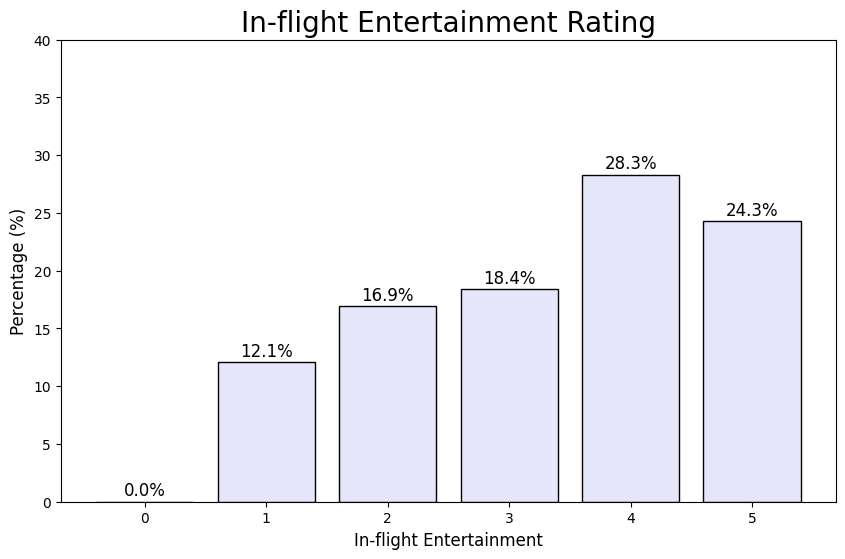

In [ ]:
counts = df['In-flight Entertainment'].value_counts(normalize=True) * 100
sorted_counts = counts.sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_counts.index, sorted_counts.values, color='lavender', edgecolor='black')

# Add the percentages on top of each bar
for index, value in enumerate(sorted_counts.values):
    plt.text(index + 0, value + 0.5, f'{value:.1f}%', ha='center', fontsize=12)

plt.title('In-flight Entertainment Rating', fontsize=20)
plt.xlabel('In-flight Entertainment', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 40)
plt.show()

רוב התוצאות נמאות בדירוגים גבוהים של 4 או 5. מצביע על כך שבסהכ רוב הנוסעים מרוצים משירותי הבידור בטיסה.

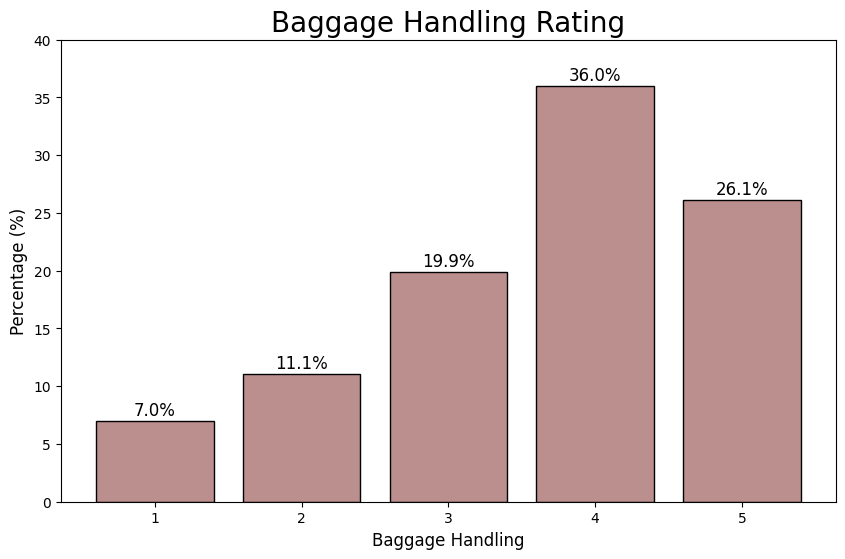

In [ ]:
counts = df['Baggage Handling'].value_counts(normalize=True) * 100
sorted_counts = counts.sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_counts.index, sorted_counts.values, color='rosybrown', edgecolor='black')

# Add the percentages on top of each bar
for index, value in enumerate(sorted_counts.values):
    plt.text(index + 1, value + 0.5, f'{value:.1f}%', ha='center', fontsize=12)

plt.title('Baggage Handling Rating', fontsize=20)
plt.xlabel('Baggage Handling', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 40)
plt.show()

מעל 60 אחוז מרוצים משירותי הכבודה

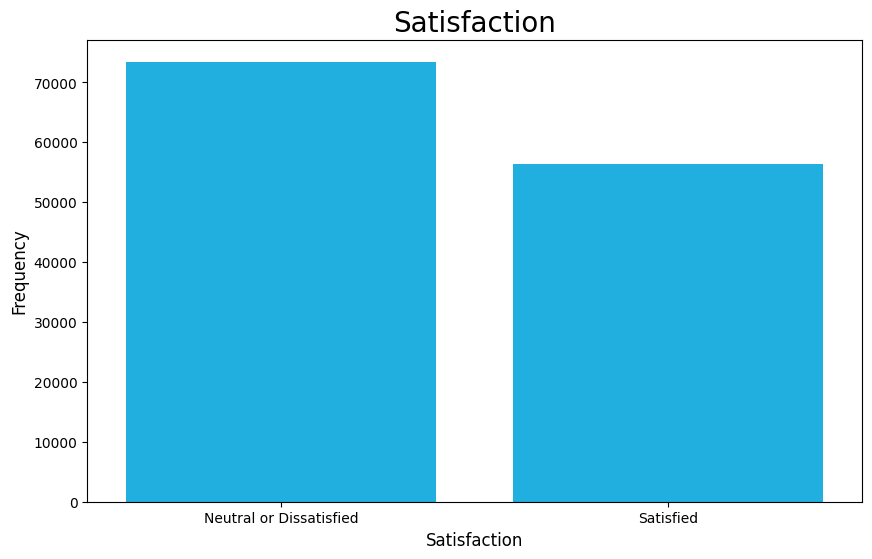

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Satisfaction'].value_counts().index,
            y=df['Satisfaction'].value_counts().values,
            color='deepskyblue')
plt.title('Satisfaction', fontsize=20)
plt.xlabel('Satisfaction', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

יש יותר אנשים ניטרליים או לא מרוצים מאשר מרוצים

###**Bivariate and Multivariate Analysis**

> Add blockquote



Hypothesis: There is a significant correlation between in-flight services and passenger satisfaction, such that specific aspects of the service are strongly related to how satisfied passengers are with their flight experience.

The code converts satisfaction levels into numerical values to facilitate correlation analysis, selects relevant columns related to different in-flight services and overall satisfaction, calculates the correlation matrix, and visualizes these correlations using a heatmap. This approach helps to identify which specific in-flight services are most closely related to passenger satisfaction.

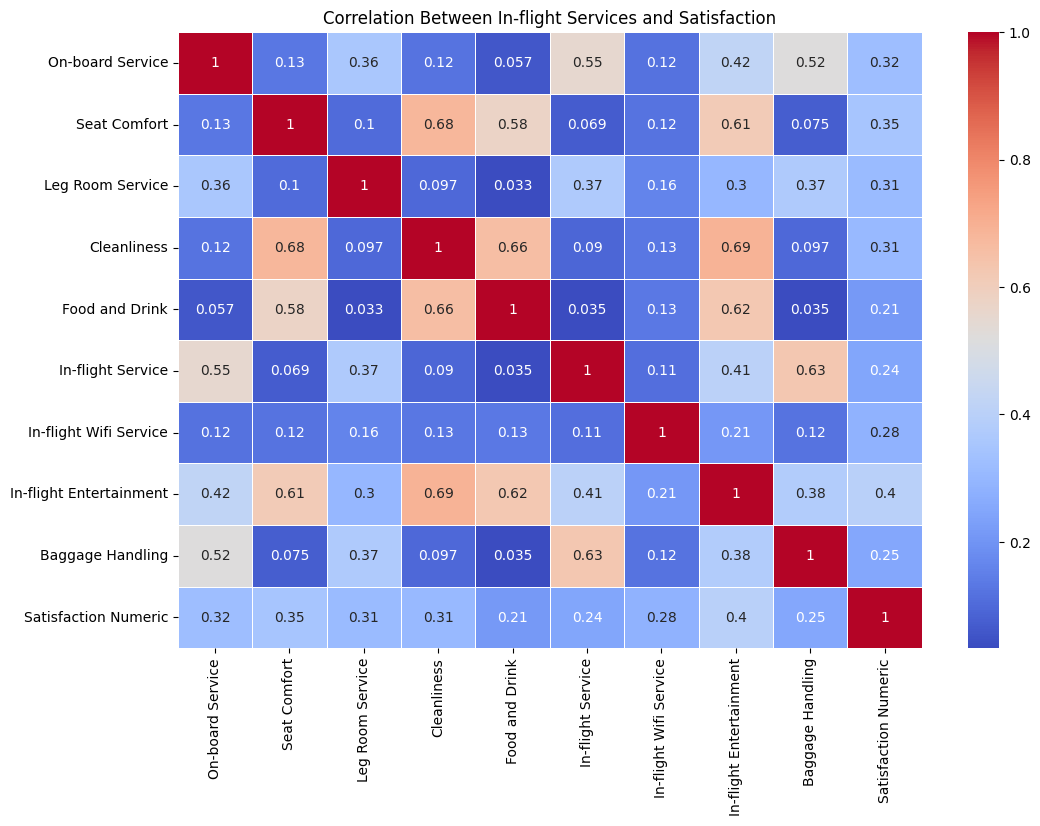

In [ ]:
# Convert Satisfaction to numerical values for correlation
df['Satisfaction Numeric'] = df['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 1})

# Selecting relevant columns for correlation
service_columns = [
    'On-board Service', 'Seat Comfort', 'Leg Room Service',
    'Cleanliness', 'Food and Drink', 'In-flight Service',
    'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Satisfaction Numeric'
]

# Correlation matrix
correlation_matrix = df[service_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between In-flight Services and Satisfaction')
plt.show()

אפשר לראות את כל הקשרים בין המשתנים הנומרים של הדאטה, יש קשרים די חזקים של 0.6-0.7 בין: רמת ניקיון ובידור בטיסה, אוכל ושתייה ובידור בטיסה, ניקיון ונוחות מושב, נוחות מושב ובידור בטיסה, שירות במהלך הטיסה ושירות כבודה,

Hypothesis:
Better ratings for on-board services, seat comfort, legroom, cleanliness, food and drink, in-flight service, wifi, entertainment, and baggage handling lead to higher overall passenger satisfaction.

Each subplot compares one of these service ratings to average satisfaction levels. If passengers who rate a service higher (e.g., 5/5 for "Seat Comfort") tend to have higher satisfaction (closer to 1), it supports the hypothesis that better in-flight services contribute to higher satisfaction.

The visual results would suggest:

Positive association: If the bars for higher ratings show a higher average satisfaction level (closer to 1).
No association or weak association: If the satisfaction level remains the same across different ratings or doesn't significantly change.
This analysis helps identify which services (like "Seat Comfort" or "In-flight Wifi Service") are most strongly linked to overall satisfaction, supporting or rejecting the hypothesis that improving these services could lead to greater passenger satisfaction.

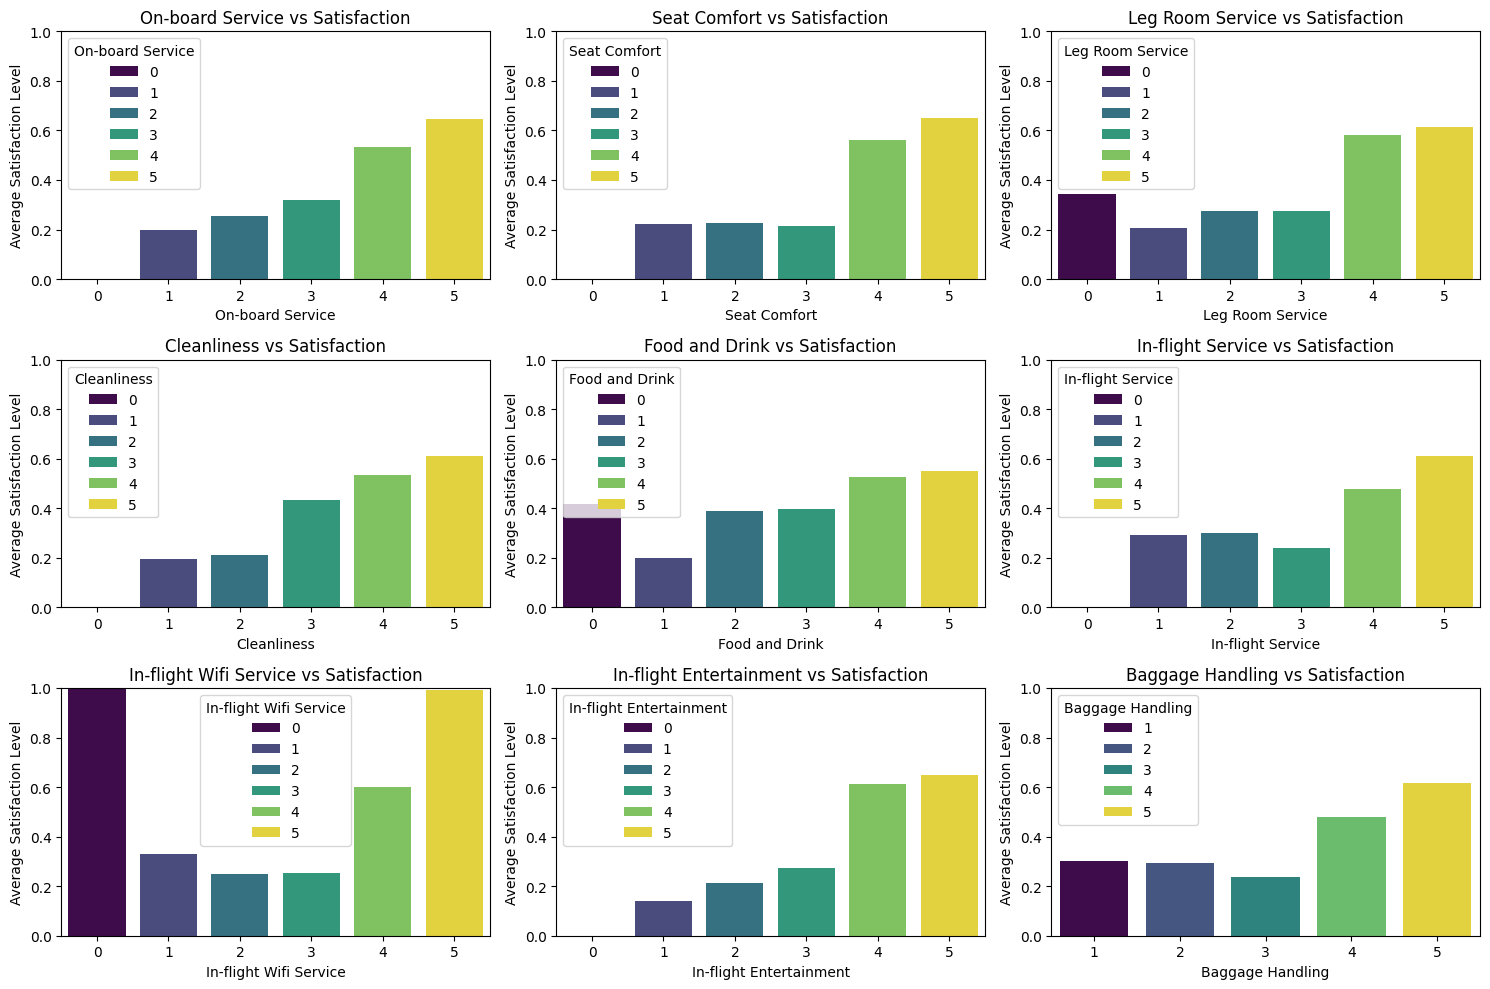

In [ ]:

# Bar plots for each service rating category to see the average satisfaction level
plt.figure(figsize=(15, 10))

for i, col in enumerate(service_columns[:-1]):  # Exclude 'Satisfaction Numeric'
    plt.subplot(3, 3, i+1)  # Create a grid of subplots
    sns.barplot(x=col, y='Satisfaction Numeric', data=df, errorbar=None, palette='viridis', hue=col, dodge=False)
    plt.title(f'{col} vs Satisfaction')
    plt.ylim(0, 1)
    plt.xlabel(col)
    plt.ylabel('Average Satisfaction Level')

plt.tight_layout()
plt.show()

יצרנו גרפים שמטרתם להציג את הקשר בין רמות השירות השונות לבין רמת שביעות הרצון הממוצעת של הנוסעים. כל גרף עמודות מציג את הציון הממוצע של שביעות הרצון (בסולם של 0 עד 1) בהשוואה לציונים שנתנו הנוסעים עבור קטגוריות שונות של שירותים, כמו שירות בטיסה וניקיון. הקוד עובר על כל אחת מקטגוריות השירות (למעט עמודת 'שביעות הרצון' עצמה) ומייצר עבורה גרף נפרד. הגרפים כוללים את שם קטגוריית השירות על ציר ה-x, ואת הציון הממוצע של שביעות הרצון על ציר ה-y. בנוסף, נעשה שימוש בפלטת צבעים שמדגישה את רמות השירות השונות, והגבלות על ציר ה-y מבטיחות שציון שביעות הרצון יוצג בטווח של 0 עד 1. התוצאה הסופית מציגה סדרה של גרפים המאפשרים להבין אילו קטגוריות שירות משפיעות יותר על שביעות הרצון הכללית של הנוסעים.
לדוגמה ניתן לראות בגרף של בידור בטיסה, ככל שהדירוג בתחום זה היה יותר גבוה כך אחוז הנוסעים שהיו מרוצים היה גבוה יותר, לעומת זאת בגרף שמייצג את דירוג שירות האינטרנט בטיסה ניתן לרות דווקא תוצאה שונה כשמי שדירג 0 את השירות דווקא היה מרוצה בסופו של דבר כלומר לא היה קשר בין שירות זה לרמת שביעות הרצון הכוללת.

Research Hypothesis: There is a significant difference in passenger satisfaction levels based on gender.
Analysis: The bar plot showing "Satisfaction by Gender" allows you to visually assess whether satisfaction levels differ between male and female passengers.

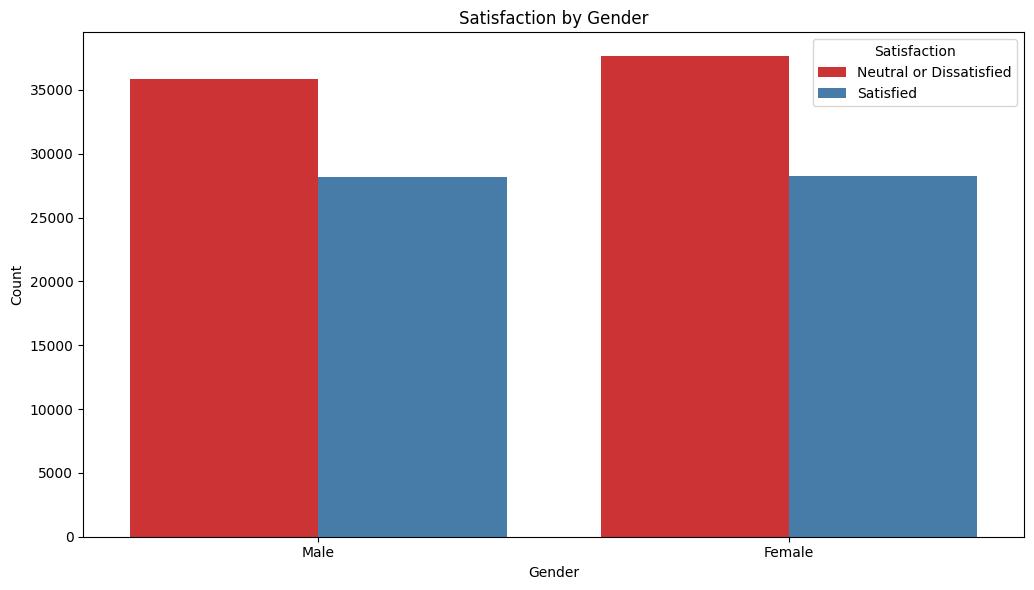

In [ ]:
plt.figure(figsize=(20, 6))

# Satisfaction by Gender
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', hue='Satisfaction', data=df, palette='Set1')
plt.title('Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

ניתן לראות כי שביעות הרצון די זהה בקרב שני המינים עם הפרשים זהים בין לקוחות מרוצים ללא מרוצים

Research Hypothesis: There is a significant difference in passenger satisfaction levels between different customer types (e.g., loyal customers vs. new customers).
Analysis: The bar plot showing "Satisfaction by Customer Type" helps determine if certain customer types report higher satisfaction levels than others.

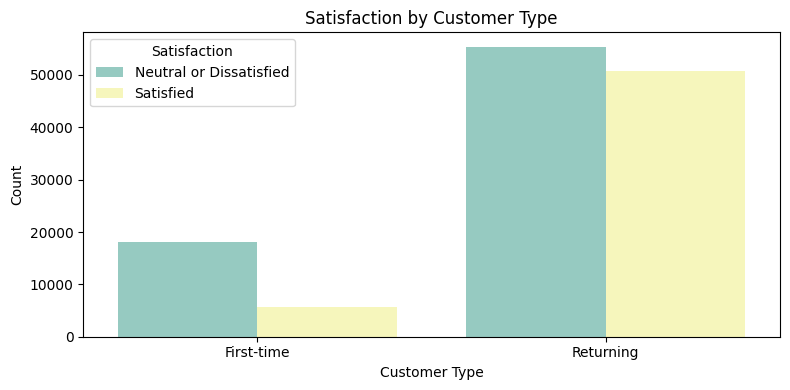

In [ ]:
plt.figure(figsize=(8, 4))  # Increase the figure size

# Satisfaction by Customer Type
sns.countplot(x='Customer Type', hue='Satisfaction', data=df, palette='Set3')
plt.title('Satisfaction by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

גם נוסעים חוזרים וגם אלה שנוסעים פעם ראשונה נוטים להיות יותר לא מרוצים או נייטרלים, אולם אצל הנוסעים החדשים ישנו הפרש גדול יותר וההבדל נראה מובהק יותר

Research Hypothesis: Passenger satisfaction varies significantly with age.
Analysis: The box plot "Satisfaction by Age" allows for a comparison of the age distribution between satisfied and neutral/dissatisfied passengers, potentially identifying trends in satisfaction based on different age groups.

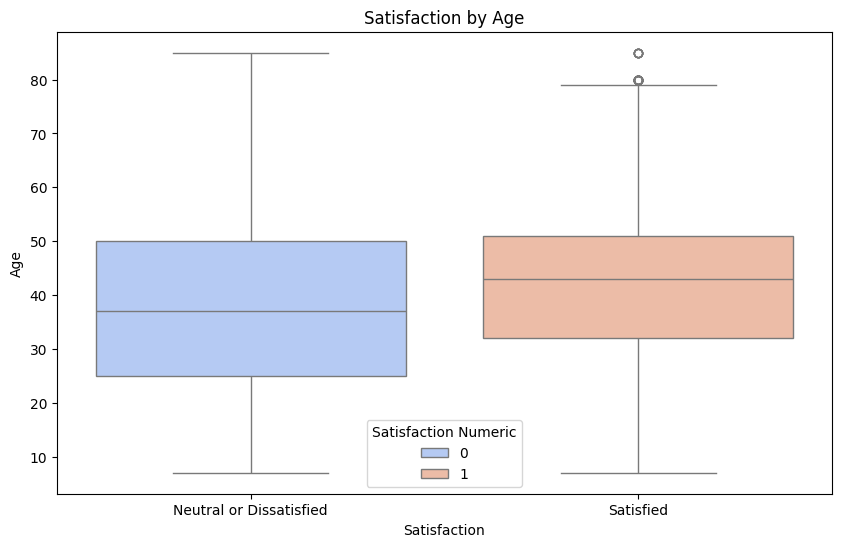

In [ ]:
plt.figure(figsize=(10, 6))

# Map Satisfaction to numeric values for box plot comparison
df['Satisfaction Numeric'] = df['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 1})

# Use hue to differentiate between Satisfaction levels
sns.boxplot(x='Satisfaction Numeric', y='Age', data=df, hue='Satisfaction Numeric', palette='coolwarm', dodge=False)
plt.title('Satisfaction by Age')
plt.xlabel('Satisfaction')
plt.xticks([0, 1], ['Neutral or Dissatisfied', 'Satisfied'])
plt.ylabel('Age')
#plt.legend([],[], frameon=False)

plt.show()

על פי הגרף ניתן לראות כי בקרב הלקוחות המרוצים הטווח של רוב הלקוחות והגיל הממוצע גדול יותר מאשר לקוחות שאינם מרוצים, כלומר ניתן להניח על פי זה כי לקוחות מבוגרים יותר נוטים להיות יותר מרוצים מלקוחות צעירים

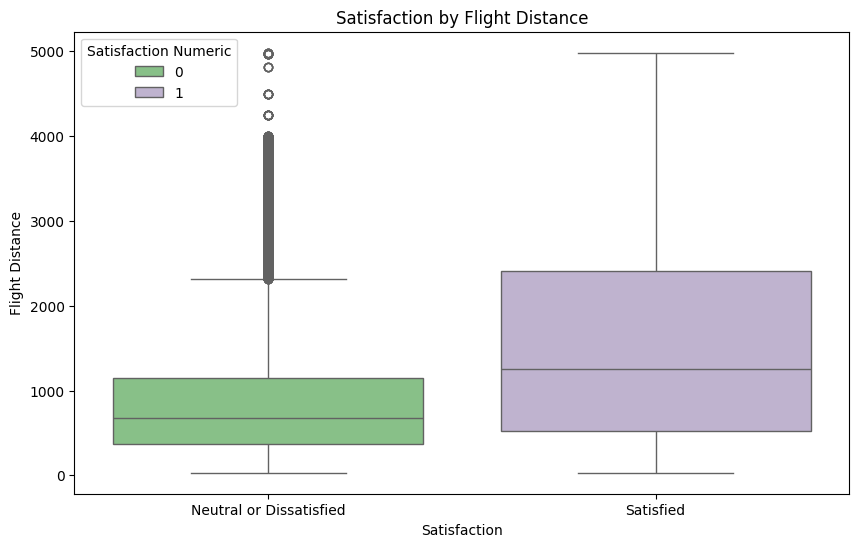

In [ ]:
plt.figure(figsize=(10, 6))

# Map Satisfaction to numeric values for box plot comparison
df['Satisfaction Numeric'] = df['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 1})

# Use hue to differentiate between Satisfaction levels
sns.boxplot(x='Satisfaction Numeric', y='Flight Distance', data=df, hue='Satisfaction Numeric', palette='Accent', dodge=False)
plt.title('Satisfaction by Flight Distance')
plt.xlabel('Satisfaction')
plt.xticks([0, 1], ['Neutral or Dissatisfied', 'Satisfied'])
plt.ylabel('Flight Distance')
#plt.legend([],[], frameon=False)

plt.show()



התפלגות הנוסעים שציינו שהיו מרוצים הייתה בטיסות ארוכות מהטיסות בהן הנוסעים שהיו ניטרליים או לא מרוצים

על פי הגרף ניתן לראות כי דווקא בקרב לקוחות מרוצים מרחק הטיסה היה הרבה יותר גדול מאשר לקוחות לא מרוצים, ואף יש הרבה הרבה ערכים חריגים שהיו אמורים לגרום לבוקס פלוט לנטות יותר כלפי מעלה. ניתן להניח כי דווקא לקוחות בטיסות ארוכות נוטים להיות יותר מרוצים מאשר לקוחות בטיסות קצרות.

Hypothesis: Passenger satisfaction levels vary by age group, with different age groups displaying distinct satisfaction patterns.

what the code does and how it supports this hypothesis:

Defining Age Bins and Labels: The code segments passengers into age groups based on specified bins, creating a new column in the dataframe to represent these groups.

Creating the 'Age Group' Column: This column classifies each passenger into one of the defined age groups.

Visualizing Satisfaction Levels: Using a grouped bar plot (via countplot), the code visualizes the frequency of satisfaction levels within each age group.

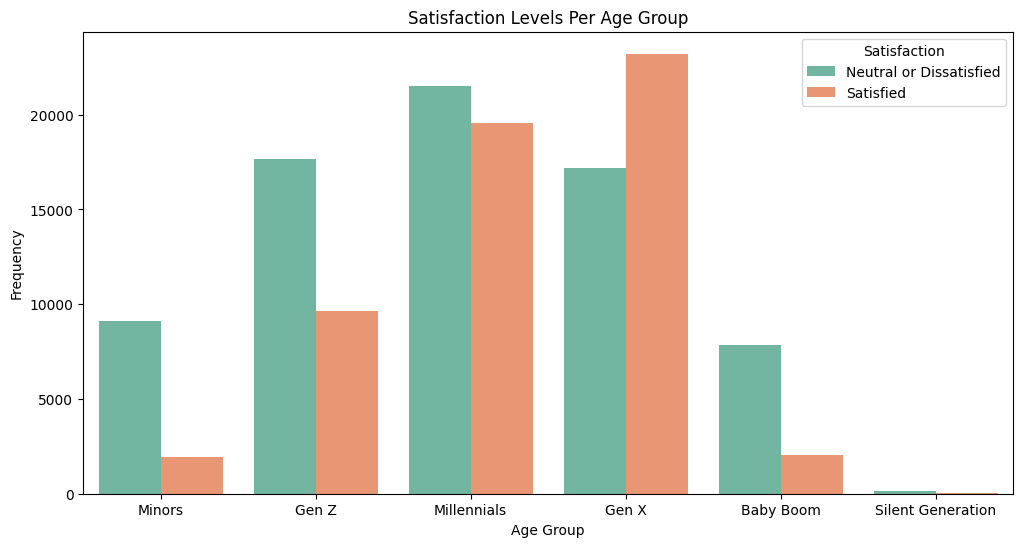

In [ ]:
# Define age bins and labels
age_bins = [-float('inf'), 18, 29, 44, 60, 78, float('inf')]
age_labels = ['Minors', 'Gen Z', 'Millennials', 'Gen X', 'Baby Boom', 'Silent Generation']

# Create a new column 'Age Group' with the specified bins
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Create a grouped bar plot for Satisfaction per Age Group
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age Group', hue='Satisfaction', palette='Set2')
plt.title("Satisfaction Levels Per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.legend(title='Satisfaction')
plt.show()

אפשר לראות כי ישנם הבדלים מהותיים בין הדורות השונים, בעיקר הבדלים של גילאי הקצות למול גילאי הביניים

Hypothesis: There is a positive correlation between the overall score derived from in-flight service ratings and passenger satisfaction, indicating that higher overall service ratings are associated with higher levels of satisfaction.


The code sums up the values in the rating columns to create an Overall Score for each passenger. This score represents the aggregate assessment of various in-flight services.

The code converts satisfaction levels into numerical values for correlation analysis, with 'Neutral or Dissatisfied' mapped to 0 and 'Satisfied' mapped to 1.

Calculate Correlation Coefficient: The code computes the correlation coefficient between the Overall Score and Satisfaction Numeric to quantify the strength and direction of their relationship.

finally, we displays the first few rows of the Overall Score column and the correlation coefficient.

In [ ]:
# List of columns to include in the overall score calculation
rating_columns = [
    'On-board Service', 'Seat Comfort', 'Leg Room Service',
    'Cleanliness', 'Food and Drink', 'In-flight Service',
    'In-flight Wifi Service', 'In-flight Entertainment',
    'Baggage Handling'
]

# Calculate the overall score by summing the values in the rating columns
df['Overall Score'] = df[rating_columns].sum(axis=1)

print(df[['Overall Score']].head())

   Overall Score
0             38
1             39
2             34
3             40
4             32


In [ ]:
# Map Satisfaction to numeric values if not already done
df['Satisfaction Numeric'] = df['Satisfaction'].map({'Neutral or Dissatisfied': 0, 'Satisfied': 1})

# Calculate the correlation coefficient
correlation = df['Overall Score'].corr(df['Satisfaction Numeric'])
print(f'Correlation between Overall Score and Satisfaction: {correlation:.2f}')



Correlation between Overall Score and Satisfaction: 0.50


**A correlation coefficient of 0.50 reflects a moderate positive correlation**

Hypothesis: The distribution of the overall score varies across different categories of gender, customer type, type of travel, and class, indicating that these categorical factors influence the overall service ratings given by passengers.

breakdown of what the code does and how it supports this hypothesis:
The code specifies categorical columns (Gender, Customer Type, Type of Travel, and Class) for analysis.

For each categorical variable, the code generates a box plot to visualize the distribution of the Overall Score. This allows you to compare how the overall score differs among different categories.

Each box plot shows the spread and central tendency of overall scores for each category, helping identify any significant differences or patterns.

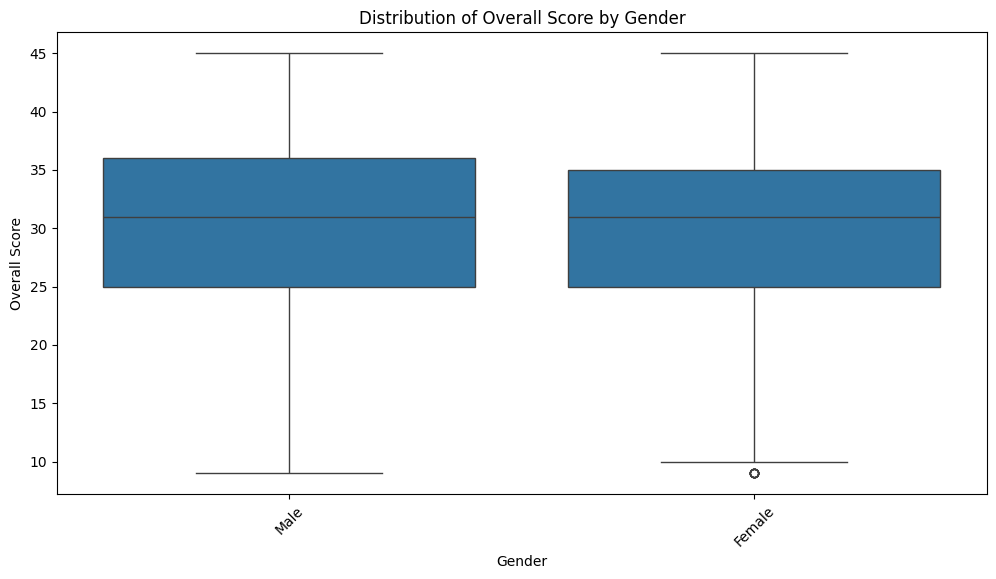

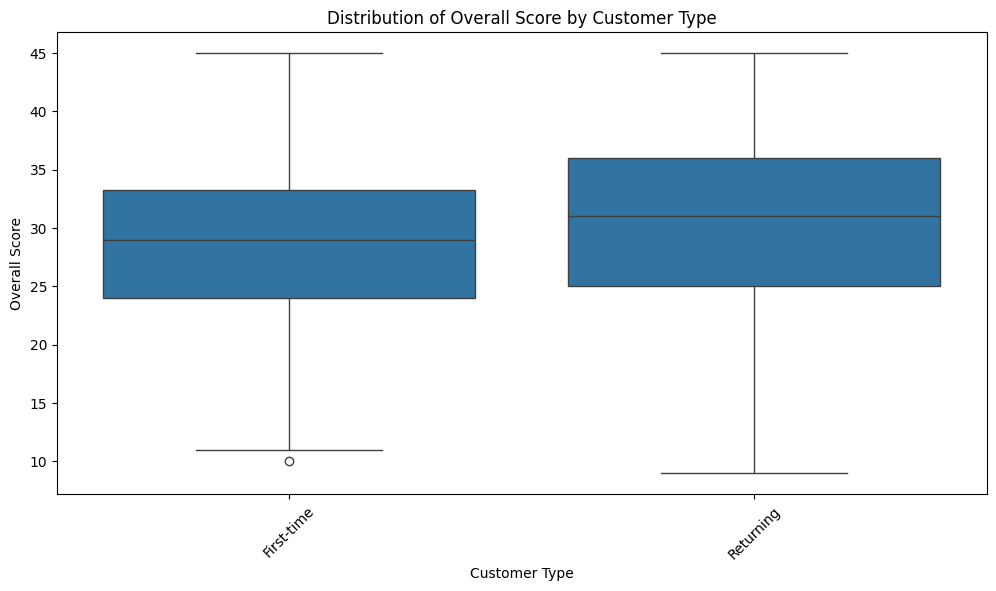

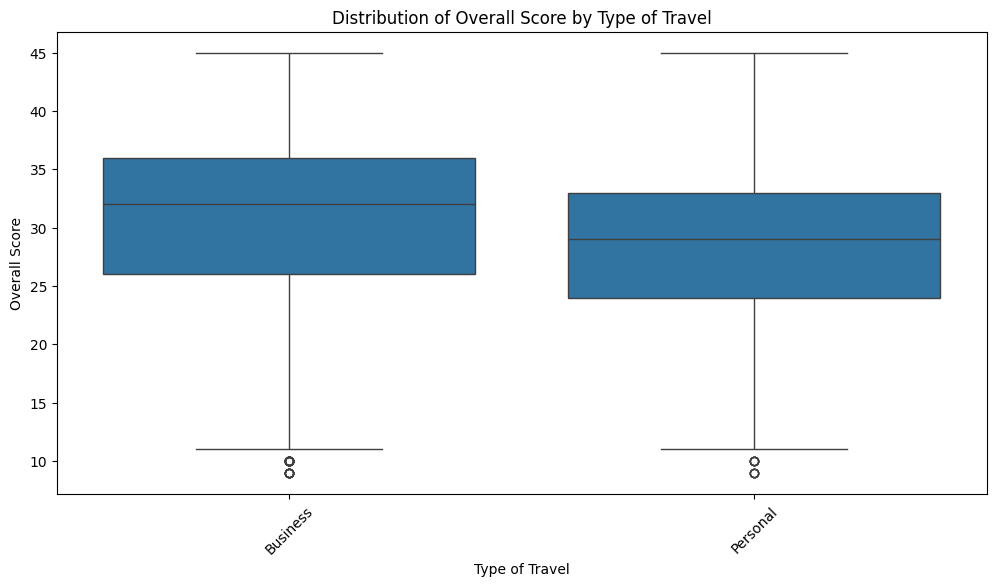

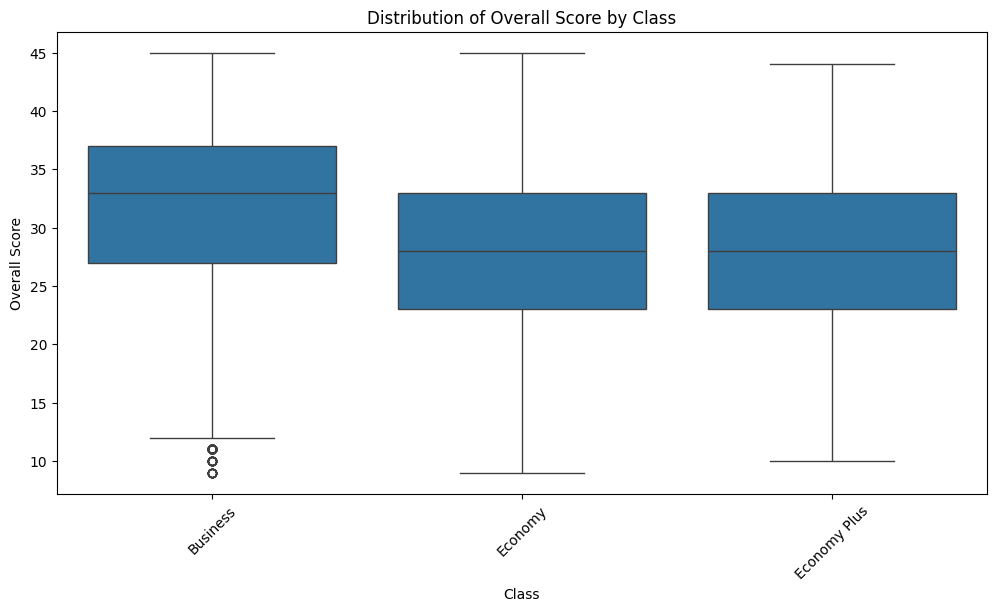

In [ ]:
# List of categorical columns to analyze
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Create box plots for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='Overall Score', data=df)
    plt.title(f'Distribution of Overall Score by {col}')
    plt.xlabel(col)
    plt.ylabel('Overall Score')
    plt.xticks(rotation=45)
    plt.show()

Hypothesis: The mean overall score differs across different categories of gender, customer type, type of travel, and class, indicating that these categorical factors affect the average service ratings given by passengers.

אפשר לראות את הציון הממוצע הכולל של הלקוחות לפי התפלגויות שונות במשתנים הקטגוריאלים:
גברים מול נשים- אין הבדל כמעט בציון הממוצע הכולל
לקוח חדש מול חוזר- הציון הממוצע של לקוח חוזר מעט יותר גבוה
לקוח למטרת עסקים מול לקוח למטרת תיירות- ניתן לזהות שהציון של לקוח עסקי גבוה יותר
לקוח ממחלקת עסקים מול מחלקת תיירים ותיירים פלוס- ניתן לזהות הבדל משמעותי בציון של מחלקת עסקים שהוא גבוה בהרבה משתי המחלקות האחרות

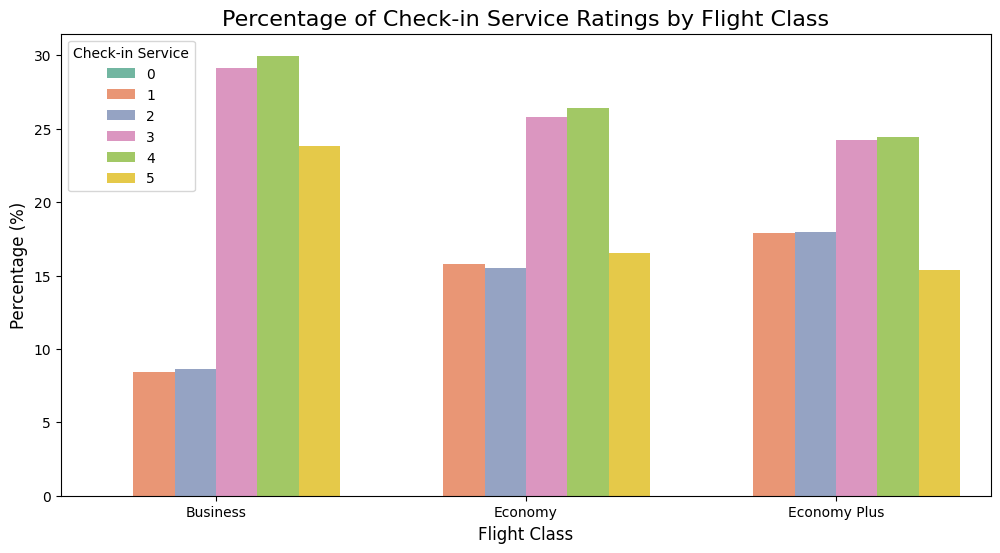

In [ ]:
rating_counts = df.groupby(['Class', 'Check-in Service']).size().reset_index(name='Count')
rating_counts['Percentage'] = rating_counts.groupby('Class')['Count'].transform(lambda x: (x / x.sum()) * 100)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Class', y='Percentage', hue='Check-in Service', data=rating_counts, palette='Set2')

# Add titles and labels
plt.title('Percentage of Check-in Service Ratings by Flight Class', fontsize=16)
plt.xlabel('Flight Class', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Show the plot
plt.show()

הגרף הנ"ל מראה את אחוזי הדירוגים של הצ'אק אין לפי מחלקה. אפשר לראות שבביזנס הדירוגים גבוהים יותר

Hypothesis: we examined is whether business class passengers rate the on-board service higher than economy and premium economy class passengers. The rationale behind this hypothesis stems from the fact that business class passengers typically receive more enhanced services compared to those in economy and premium economy classes. The upgraded services in business class include more spacious seating, access to lounges, and more personalized attention from the flight attendants. All these factors contribute to an improved flight experience, which may lead to higher service ratings by passengers in this class. Therefore, we aimed to test whether this assumption holds true in reality. To test this hypothesis, we used a box plot divided by the different passenger categories and analyzed the distribution of ratings for each category.

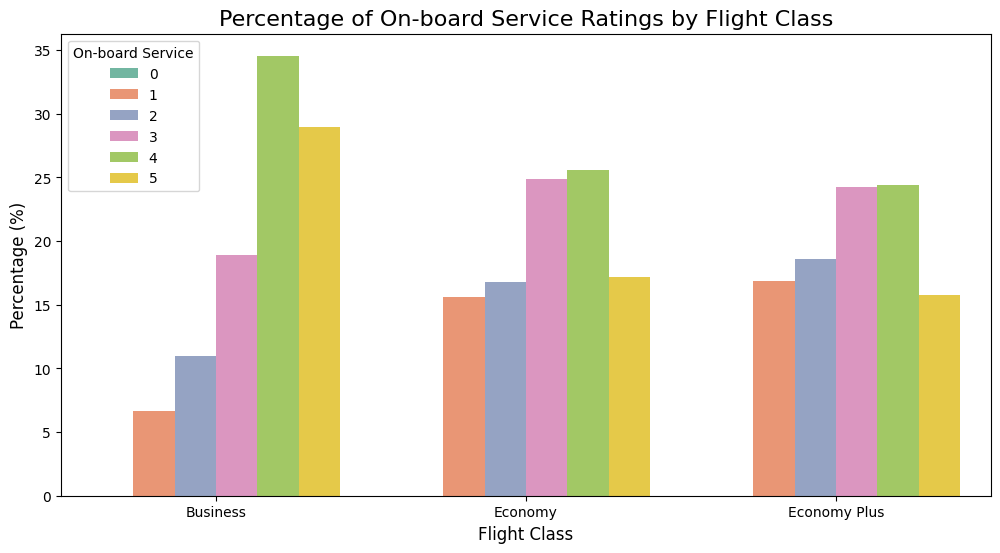

In [ ]:
rating_counts = df.groupby(['Class', 'On-board Service']).size().reset_index(name='Count')
rating_counts['Percentage'] = rating_counts.groupby('Class')['Count'].transform(lambda x: (x / x.sum()) * 100)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Class', y='Percentage', hue='On-board Service', data=rating_counts, palette='Set2')

# Add titles and labels
plt.title('Percentage of On-board Service Ratings by Flight Class', fontsize=16)
plt.xlabel('Flight Class', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Show the plot
plt.show()

הגרף הנ"ל מראה את אחוזי הדירוגים של השירות בטיסה לפי מחלקה. אפשר לראות שבביזנס הדירוגים גבוהים יותר

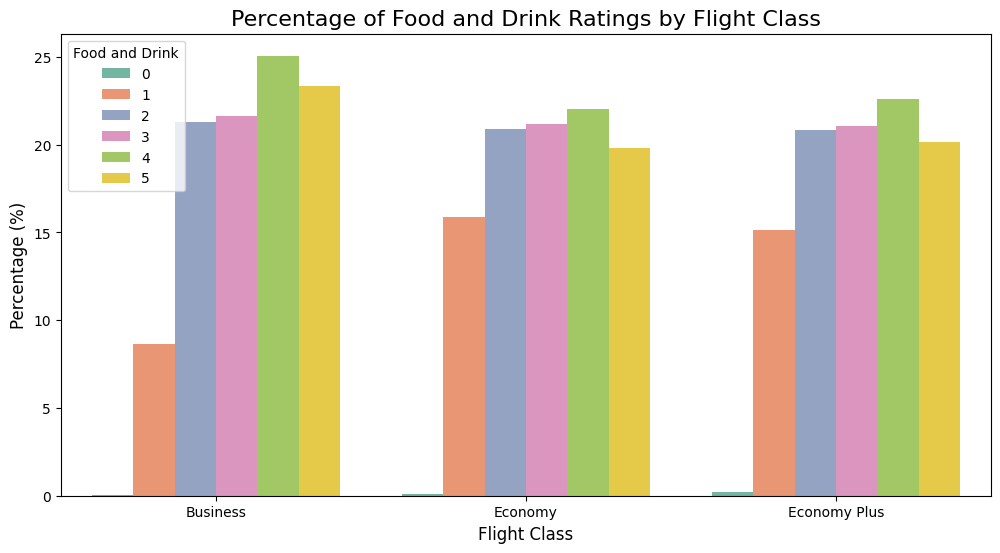

In [ ]:
rating_counts = df.groupby(['Class', 'Food and Drink']).size().reset_index(name='Count')
rating_counts['Percentage'] = rating_counts.groupby('Class')['Count'].transform(lambda x: (x / x.sum()) * 100)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Class', y='Percentage', hue='Food and Drink', data=rating_counts, palette='Set2')

# Add titles and labels
plt.title('Percentage of Food and Drink Ratings by Flight Class', fontsize=16)
plt.xlabel('Flight Class', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Show the plot
plt.show()

הגרף הנ"ל מראה את אחוזי הדירוגים של האוכל והשתיה לפי מחלקה. אפשר לראות שבביזנס הדירוגים גבוהים יותר במקצת, סה"כ די מאוזן. בביזנס פחות אנשים דירגו 0 או 1

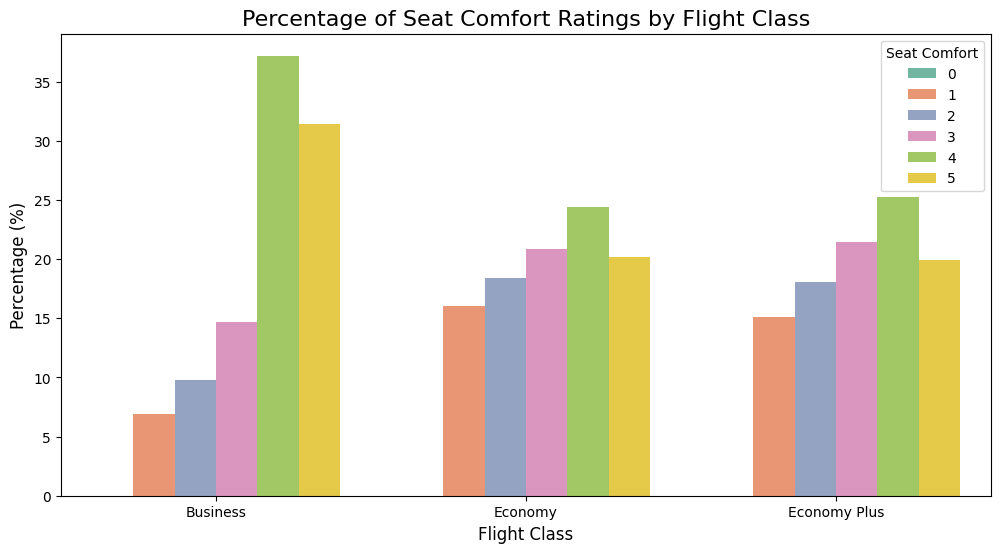

In [ ]:
rating_counts = df.groupby(['Class', 'Seat Comfort']).size().reset_index(name='Count')
rating_counts['Percentage'] = rating_counts.groupby('Class')['Count'].transform(lambda x: (x / x.sum()) * 100)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Class', y='Percentage', hue='Seat Comfort', data=rating_counts, palette='Set2')

# Add titles and labels
plt.title('Percentage of Seat Comfort Ratings by Flight Class', fontsize=16)
plt.xlabel('Flight Class', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Show the plot
plt.show()

הגרף הנ"ל מראה את אחוזי הדירוגים של הנוחות הכיסא לפי מחלקה. אפשר לראות שבביזנס הדירוגים גבוהים יותר

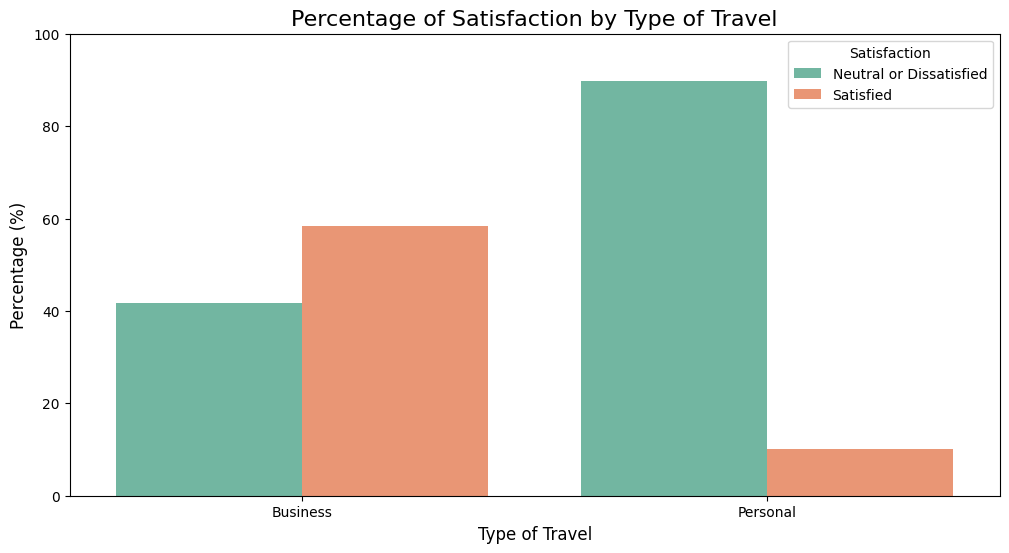

In [ ]:
sti_counts = df.groupby(['Type of Travel', 'Satisfaction']).size().reset_index(name='Count')
sti_counts['Percentage'] = sti_counts.groupby('Type of Travel')['Count'].transform(lambda x: (x / x.sum()) * 100)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Type of Travel', y='Percentage', hue='Satisfaction', data=sti_counts, palette='Set2')

# Add titles and labels
plt.title('Percentage of Satisfaction by Type of Travel', fontsize=16)
plt.xlabel('Type of Travel', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 100)
# Show the plot
plt.show()

ניתן לראות באופן משמעותי כי נוסעים הטסים למען עסקים מרוצים הרבה יותר מנוסעים שטסים לטיסות אישיות

בעקבות כך, חיפשנו משתנה נוסף שיכול להשפיע על תוצאות אלו ועל כן בדקנו לפי סוג מחלקה

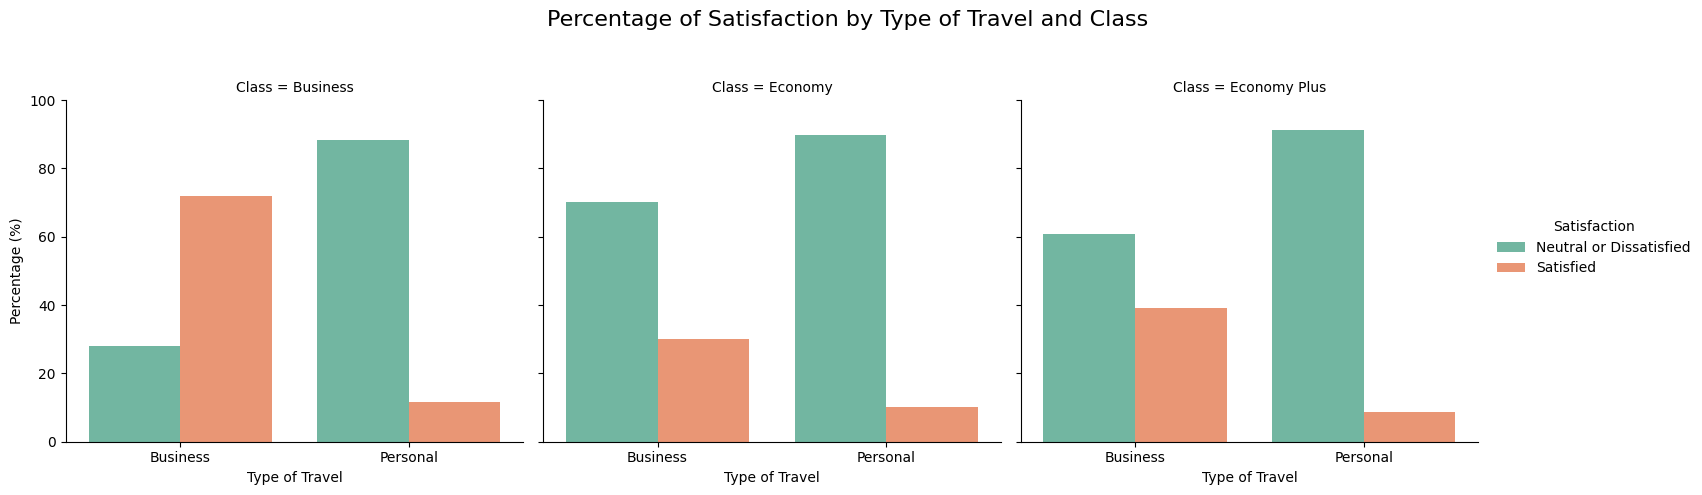

In [ ]:
sti_counts = df.groupby(['Type of Travel', 'Satisfaction', 'Class']).size().reset_index(name='Count')


sti_counts['Percentage'] = sti_counts.groupby(['Type of Travel', 'Class'])['Count'].transform(lambda x: (x / x.sum()) * 100)

# יצירת גרף עם חלוקה לפי סוג מחלקה
g = sns.catplot(
    data=sti_counts,
    x='Type of Travel',
    y='Percentage',
    hue='Satisfaction',
    col='Class',
    kind='bar',
    height=5,
    aspect=1,
    palette='Set2'
)


g.fig.suptitle('Percentage of Satisfaction by Type of Travel and Class', fontsize=16)
g.set_axis_labels('Type of Travel', 'Percentage (%)')
g.set(ylim=(0, 100))
plt.subplots_adjust(top=0.80)

plt.show()

התוצאות מראות שנוסעים שטסים במחלקת ביזנס לצורך עסקים מרוצים מאוד ואילו בשאר הקטגוריות השונות אין הבדל בין התוצאות - כולם יותר מאוכזבים מהטיסה מאשר מרוצים

Hypothesis: It is expected that there will be more satisfied passengers on flights that took off without delay compared to flights that experienced a takeoff delay."

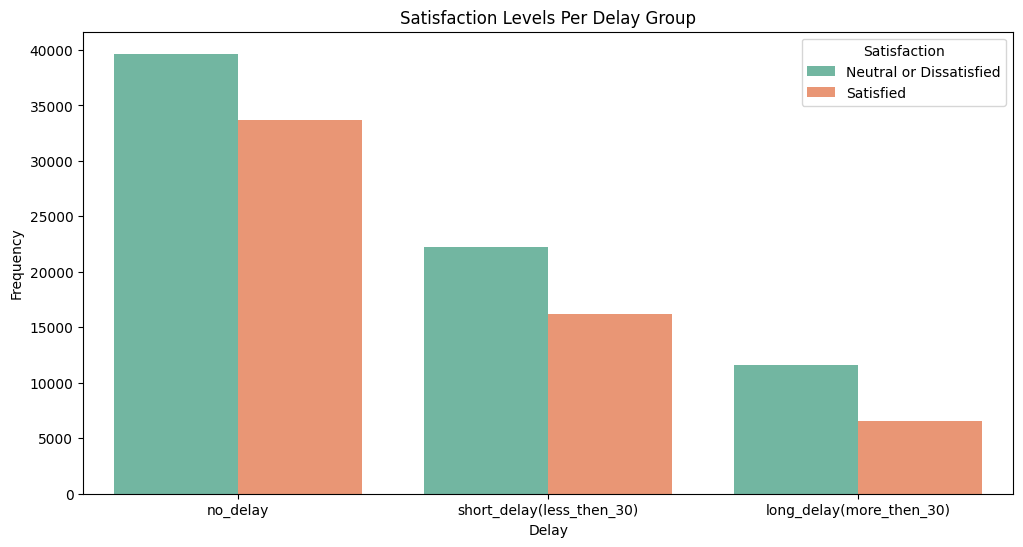

In [ ]:
delay_bins = [-float('inf'), 0, 30, float('inf')]
delay_labels = ['no_delay', 'short_delay(less_then_30)', 'long_delay(more_then_30)']

# Categorize the 'Departure Delay' into these bins
df['delay'] = pd.cut(df['Departure Delay'], bins=delay_bins, labels=delay_labels)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='delay', hue='Satisfaction', palette='Set2')
plt.title("Satisfaction Levels Per Delay Group")
plt.xlabel("Delay")
plt.ylabel("Frequency")
plt.legend(title='Satisfaction')
plt.show()

:שביעות רצון לפי דיליי בהמראה. הדאטה חולק ללא דיליי, דיליי קצר (עד 30 דקות) ודיליי ארוך (30 דקות ומעלה)

<ipython-input-72-573381bafc25>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['delay', 'Satisfaction']).size().unstack(fill_value=0)


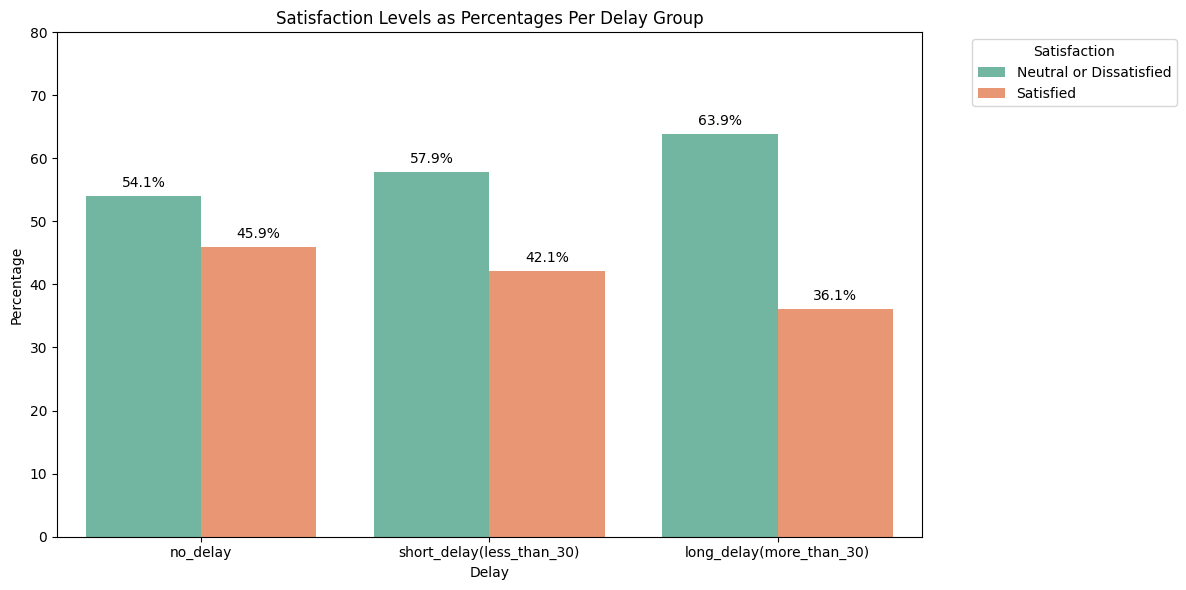

In [ ]:
# Define delay bins and labels
delay_bins = [-float('inf'), 0, 30, float('inf')]
delay_labels = ['no_delay', 'short_delay(less_than_30)', 'long_delay(more_than_30)']

# Categorize the 'Departure Delay' into these bins
df['delay'] = pd.cut(df['Departure Delay'], bins=delay_bins, labels=delay_labels)

# Calculate percentage of each Satisfaction level within each delay group
grouped = df.groupby(['delay', 'Satisfaction']).size().unstack(fill_value=0)
percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

# Reset index to melt the dataframe for seaborn
percentages = percentages.reset_index().melt(id_vars='delay', var_name='Satisfaction', value_name='Percentage')

# Plotting
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=percentages, x='delay', y='Percentage', hue='Satisfaction', palette='Set2')

# Annotate percentages on bars
for p in barplot.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than 0
        barplot.text(
            p.get_x() + p.get_width() / 2,
            height + 1,  # Adjust the position above the bar
            f'{height:.1f}%',  # Format percentage with one decimal place
            ha='center',
            va='bottom'
        )

# Adjust legend placement
plt.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Satisfaction Levels as Percentages Per Delay Group")
plt.xlabel("Delay")
plt.ylabel("Percentage")
plt.tight_layout()  # Adjust layout to make room for the legend
plt.ylim(0, 80)
plt.show()


באותו האופן בדקנו כמדד יחסי של אחוזים. התוצאות מראות שאכן יש ירידה בנוסעים מרוצים כאשר יש דיליי

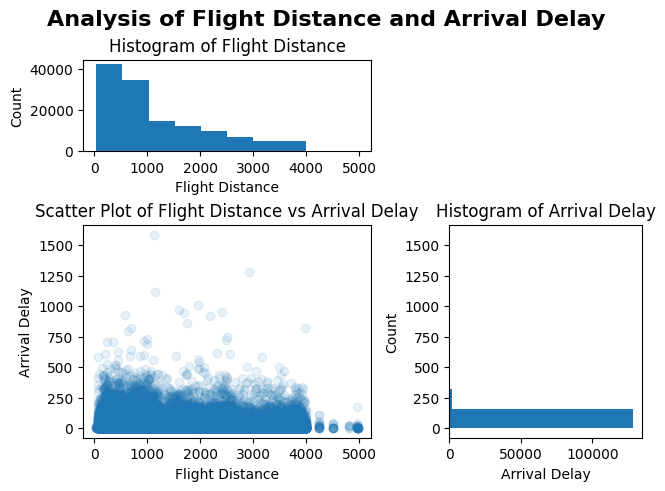

In [ ]:
fig = plt.figure(constrained_layout=True)

grid = GridSpec(10, 10, figure=fig)

ax1 = fig.add_subplot(grid[3:10, 0:6])
o1 = 'Flight Distance'
o2 = 'Arrival Delay'
ax1.scatter(
    df[o1],
    df[o2],
    alpha=.1
           )
ax1.set_title('Scatter Plot of Flight Distance vs Arrival Delay')
ax1.set_xlabel(o1)
ax1.set_ylabel(o2)

ax2 = fig.add_subplot(grid[0:3, 0:6])
ax2.hist(df[o1])
ax2.set_title('Histogram of '+o1)
ax2.set_xlabel(o1)
ax2.set_ylabel('Count')

ax3 = fig.add_subplot(grid[3:10, 6:])
ax3.hist(df[o2],
        orientation="horizontal")
ax3.set_title('Histogram of '+o2)
ax3.set_xlabel(o2)
ax3.set_ylabel('Count')

fig.suptitle('Analysis of Flight Distance and Arrival Delay', fontsize=16, fontweight='bold')

plt.show()

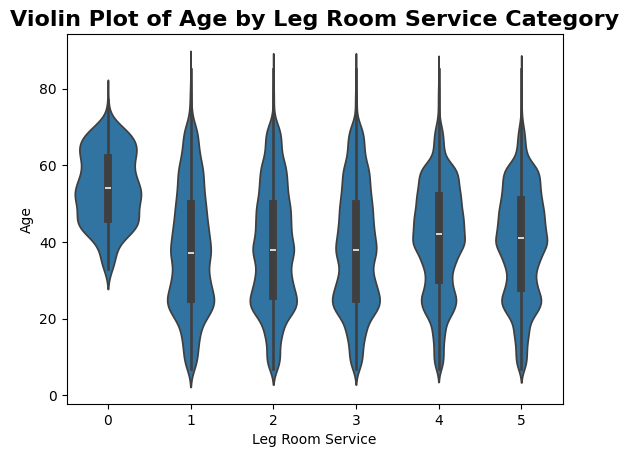

In [ ]:
sns.violinplot(data=df, x='Leg Room Service', y='Age')

plt.title('Violin Plot of Age by Leg Room Service Category', fontsize=16, fontweight='bold')
plt.xlabel('Leg Room Service')
plt.ylabel('Age')

plt.show()

השערה - מכיוון שלאנשים צעירים יותר קל לשבת במשך זמן ארוך במטוס, אנחנו נראה שבקטגוריה של הלקוחות הפחות מרוצים מבחינת המיקום לרגליים התפלגות הגילאים תהיה יותר גבוהה, כלומר ככל שהלקוח מבוגר יותר - כך עולים הסיכויים שיהיה לו לא נוח במטוס.

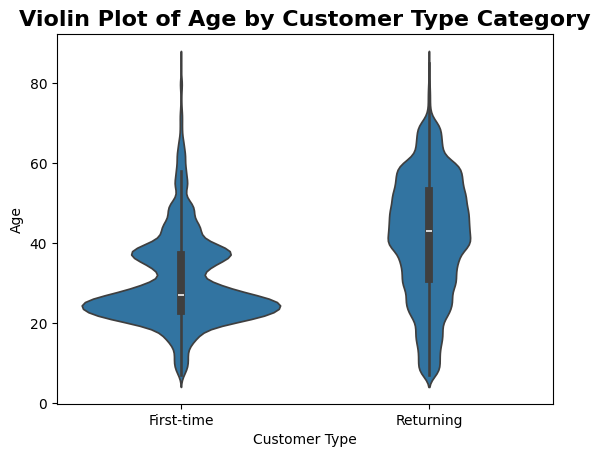

In [ ]:
sns.violinplot(data=df, x='Customer Type', y='Age')

plt.title('Violin Plot of Age by Customer Type Category', fontsize=16, fontweight='bold')
plt.xlabel('Customer Type')
plt.ylabel('Age')

plt.show()

השערה - אם נבדוק את התפלגויות הגילאים עבור הקטגוריה של סוג הטיסה, כנראה שעבור הטסים בפעם הראשונה התפלגות הגילאים תהיה נמוכה יותר. מכיוון שלרוב אנשים יטוסו בפעם הראשונה בגיל צעיר.

In [ ]:
df.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction',
       'Satisfaction Numeric', 'Age Group', 'Overall Score', 'delay'],
      dtype='object')

In [ ]:
# Count rows where both Arrival Delay and Departure Delay are greater than 0
delay_count = df[(df['Arrival Delay'] > 0) & (df['Departure Delay'] > 0)].shape[0]

print(f'Number of rows with both arrival delay and departure delay: {delay_count}')

Number of rows with both arrival delay and departure delay: 42876


Hypothesis: Passengers who experienced both arrival and departure delays have different satisfaction levels compared to those who experienced no delays, with potentially lower satisfaction among those with delays.

what the code does and how it supports this hypothesis:

Filter for Delays:

delayed_df: Contains rows where both arrival and departure delays are present.
no_delay_df: Contains rows where neither arrival nor departure delays are present.
Label Delay Types: Adds a column to each filtered dataset to label the type of delay ('delay on both Delays' or 'No Delays').

Combine Datasets: Merges the two datasets into a single DataFrame for comparison.

Plot Distribution of Satisfaction: Uses a count plot to visualize the number of passengers in each satisfaction category, separated by delay type. This helps to compare how satisfaction levels differ between the two groups.

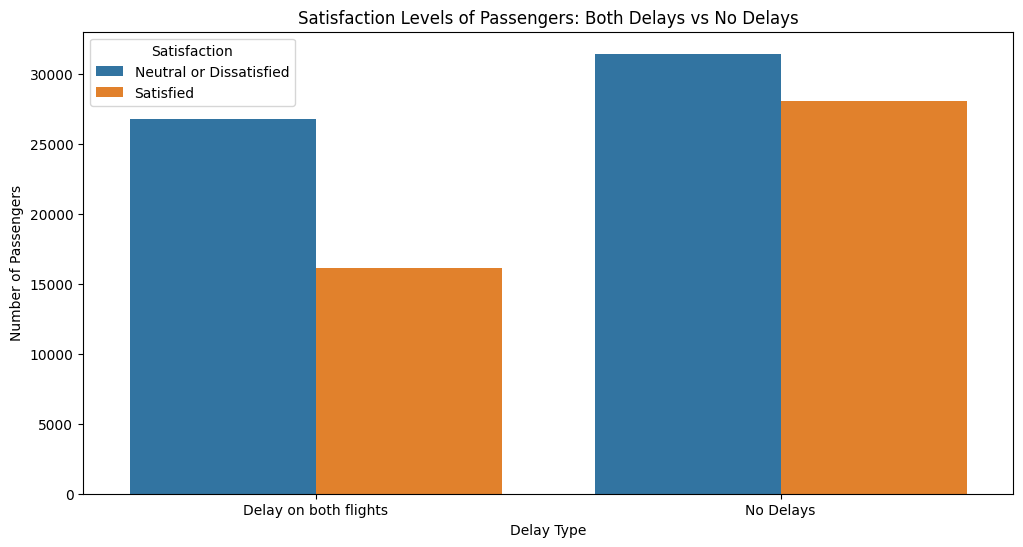

In [ ]:
# Filter the dataset for rows with both arrival and departure delays
delayed_df = df[(df['Arrival Delay'] > 0) & (df['Departure Delay'] > 0)].copy()
delayed_df['Delay Type'] = 'Delay on both flights'

# Filter the dataset for rows with no arrival and no departure delays
no_delay_df = df[(df['Arrival Delay'] == 0) & (df['Departure Delay'] == 0)].copy()
no_delay_df['Delay Type'] = 'No Delays'

# Combine the two datasets
combined_df = pd.concat([delayed_df, no_delay_df])

# Plot the distribution of Satisfaction for both groups
plt.figure(figsize=(12, 6))
sns.countplot(x='Delay Type', hue='Satisfaction', data=combined_df, palette='tab10')

plt.title('Satisfaction Levels of Passengers: Both Delays vs No Delays')
plt.xlabel('Delay Type')
plt.ylabel('Number of Passengers')
plt.legend(title='Satisfaction')
plt.show()

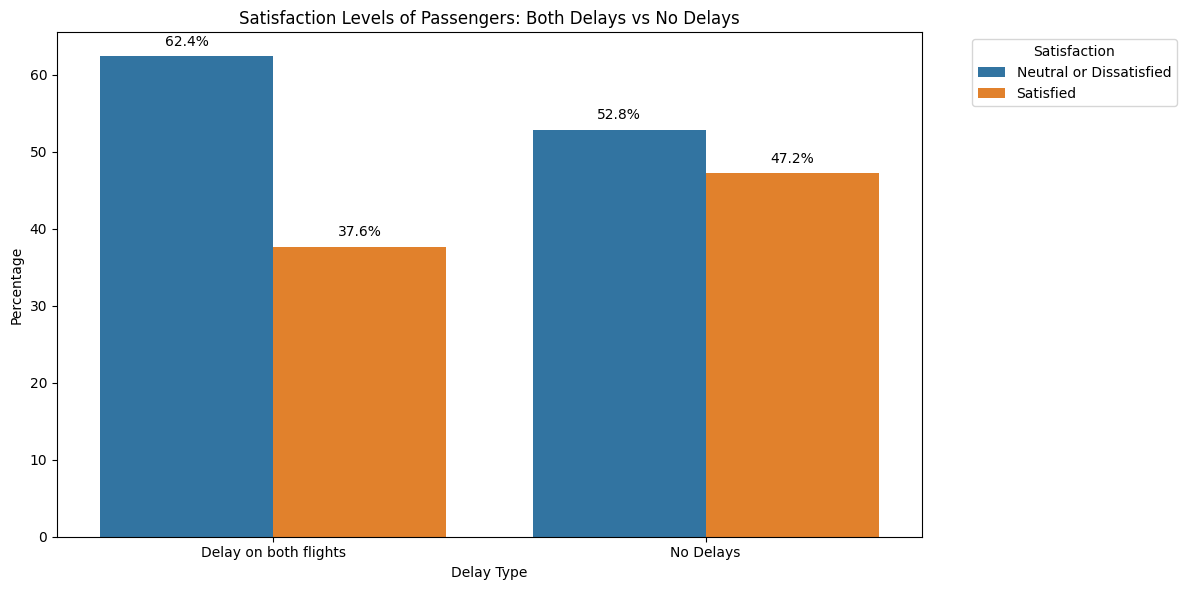

In [ ]:
delayed_df = df[(df['Arrival Delay'] > 0) & (df['Departure Delay'] > 0)].copy()
delayed_df['Delay Type'] = 'Delay on both flights'

# Filter the dataset for rows with no arrival and no departure delays
no_delay_df = df[(df['Arrival Delay'] == 0) & (df['Departure Delay'] == 0)].copy()
no_delay_df['Delay Type'] = 'No Delays'

# Combine the two datasets
combined_df = pd.concat([delayed_df, no_delay_df])

# Calculate percentage of each Satisfaction level within each Delay Type
grouped = combined_df.groupby(['Delay Type', 'Satisfaction']).size().unstack(fill_value=0)
percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

# Reset index to melt the dataframe for seaborn
percentages = percentages.reset_index().melt(id_vars='Delay Type', var_name='Satisfaction', value_name='Percentage')

# Plotting
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=percentages, x='Delay Type', y='Percentage', hue='Satisfaction', palette='tab10')

# Annotate percentages on bars
for p in barplot.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is greater than 0
        barplot.text(
            p.get_x() + p.get_width() / 2,
            height + 1,  # Adjust the position above the bar
            f'{height:.1f}%',  # Format percentage with one decimal place
            ha='center',
            va='bottom'
        )

# Adjust legend placement
plt.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Satisfaction Levels of Passengers: Both Delays vs No Delays')
plt.xlabel('Delay Type')
plt.ylabel('Percentage')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

ניתן להבחין בהבדלים בין שתי הקבוצות, אלו המרוצים ואלו שאינם מרוצים, כאשר גם בקרב הנוסעים שלא חוו עיכובים יש יותר לקוחות שאינם מרוצים מאשר מרוצים. עם זאת, ההפרש בין הלקוחות המרוצים ללא מרוצים גדול יותר בקבוצת הנוסעים שחוו עיכובים, בהשוואה לאלה שלא היו להם עיכובים כלל.

In [ ]:
print(combined_df['Delay Type'].value_counts())


Delay Type
No Delays                59498
Delay on both flights    42876
Name: count, dtype: int64
